In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
data_path = os.path.join("..", "data")

dir_store_path = os.path.join(data_path, "temporary results")

full_dataset_path = os.path.join(dir_store_path, "full_dataset.xlsx")

In [3]:
dataset_df = pd.read_excel(full_dataset_path)

In [4]:
dataset_df

,Technician Counting,DateTime,Site,Bottle,Sample,Image Date Time,Dilution,Coliform (1ml),Ecoli (1ml),Technician Water Quality,Temp C,Ph,Cond (ms)
0,Admin,2023-09-05 10:10:00,B,1,1,2023-10-13 13:05:35,1:1,334,7,NaN,22.0,7.6,2.15625
1,Admin,2023-09-05 10:10:00,B,1,2,2023-10-13 13:06:12,1:1,364,9,NaN,22.0,7.6,2.15625
2,Admin,2023-09-05 10:10:00,B,2,1,2023-10-13 13:06:57,1:1,26,4,NaN,21.0,7.6,2.12500
3,Admin,2023-09-05 10:10:00,B,2,2,2023-10-13 13:07:50,1:1,43,10,NaN,21.0,7.6,2.12500
4,Admin,2023-09-05 11:26:00,B,1,1,2023-10-13 13:09:26,1:1,36,5,NaN,21.0,7.6,1.81250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Alisha,2023-06-29 11:47:00,B,1,1,NaT,NaN,131,241,Anan - Alisha,22.0,7.9,3.00000
1508,Alisha,2023-06-29 11:22:00,A,1,2,NaT,NaN,16,81,Anan - Alisha,22.0,7.9,3.28125
1509,Alisha,2023-06-29 11:22:00,A,1,1,NaT,NaN,12,95,Anan - Alisha,22.0,7.9,3.28125
1510,Alisha,2023-06-29 11:22:00,A,2,2,NaT,NaN,6,42,Anan - Alisha,22.0,7.9,3.31250


### Get TNTC samples

In [5]:
tntc_df = dataset_df[
    (dataset_df["Coliform (1ml)"] == "TNTC")
    | (dataset_df["Ecoli (1ml)"] == "TNTC")
    | (dataset_df["Coliform (1ml)"] == 0)
]

In [6]:
tntc_df

,Technician Counting,DateTime,Site,Bottle,Sample,Image Date Time,Dilution,Coliform (1ml),Ecoli (1ml),Technician Water Quality,Temp C,Ph,Cond (ms)
164,Admin,2023-09-05 10:26:00,A,2,2,2023-10-13 12:32:17,1:1,TNTC,TNTC,NaN,22.0,7.60,2.09375
205,Admin,2023-09-04 10:15:00,A,1,1,2023-10-13 16:06:18,1:1,0,38,NaN,22.3,7.90,2.81000
206,Admin,2023-09-04 10:15:00,A,1,2,2023-10-13 16:08:03,1:1,0,47,NaN,22.3,7.90,2.81000
207,Admin,2023-09-04 10:15:00,A,2,1,2023-10-13 16:09:47,1:1,0,40,NaN,21.8,7.92,2.73000
208,Admin,2023-09-04 10:15:00,A,2,2,2023-10-13 16:11:05,1:1,0,37,NaN,21.8,7.92,2.73000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,Admin,2023-08-14 15:15:00,B,2,1,2023-08-16 09:24:52,1:1,TNTC,4,NaN,20.0,7.80,1.59375
1205,Admin,2023-08-14 15:15:00,B,2,2,2023-08-16 09:25:41,1:1,TNTC,2,NaN,20.0,7.80,1.59375
1212,Admin,2023-08-14 15:35:00,C,2,1,2023-08-16 09:32:09,1:1,TNTC,3,NaN,20.0,7.90,1.98000
1220,Admin,2023-08-14 15:45:00,D,2,1,2023-08-16 09:35:30,1:1,TNTC,TNTC,NaN,20.0,7.90,1.90000


In [7]:
clean_df = dataset_df.drop(tntc_df.index)

## TNTC analysis

### Get measurements that have at least one TNTC

In [8]:
related_tntc_df = pd.merge(
    left=clean_df,
    right=tntc_df,
    on=["DateTime", "Site", "Bottle"],
    how="inner",
)

# Get columns that end with '_y'
cols_to_drop = related_tntc_df.filter(regex="_y$").columns

# Drop these columns
related_tntc_df = related_tntc_df.drop(columns=cols_to_drop)

related_tntc_df.rename(
    columns={
        "Sample_x": "Sample",
        "Image Date Time_x": "Image Date Time",
        "Dilution_x": "Dilution",
        "Coliform (1ml)_x": "Coliform (1ml)",
        "Ecoli (1ml)_x": "Ecoli (1ml)",
        "Technician Counting_x": "Technician Counting",
        "Technician Water Quality_x": "Technician Water Quality",
        "Temp C_x": "Temp C",
        "Ph_x": "Ph",
        "Cond (ms)_x": "Cond (ms)",
    },
    inplace=True,
)

related_tntc_df = pd.concat([related_tntc_df, tntc_df])

related_tntc_df = related_tntc_df.sort_values(by=["DateTime", "Site", "Bottle"])

related_tntc_df.drop_duplicates(inplace=True)

In [9]:
related_tntc_df

,Technician Counting,DateTime,Site,Bottle,Sample,Image Date Time,Dilution,Coliform (1ml),Ecoli (1ml),Technician Water Quality,Temp C,Ph,Cond (ms)
1106,Randa,2023-08-02 10:20:00,B,1,1,2023-08-03 15:41:12,1:2,TNTC,TNTC,Anan - Alisha,20.0,7.7,0.790000
1107,Randa,2023-08-02 10:20:00,B,1,1,2023-08-03 15:41:23,1:2,TNTC,TNTC,Anan - Alisha,20.0,7.7,0.790000
1108,Randa,2023-08-02 10:20:00,B,1,1,2023-08-03 15:42:09,1:2,TNTC,TNTC,Anan - Alisha,20.0,7.7,0.790000
1109,Randa,2023-08-02 10:20:00,B,1,2,2023-08-03 15:42:30,1:2,TNTC,TNTC,Anan - Alisha,20.0,7.7,0.790000
1110,Randa,2023-08-02 10:20:00,B,2,1,2023-08-03 15:42:51,1:2,TNTC,TNTC,Anan - Alisha,20.0,7.7,0.790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,Admin,2023-09-04 12:11:00,E,2,2,2023-10-12 14:51:32,1:1,0,18,NaN,22.0,7.6,1.680000
0,Admin,2023-09-05 10:26:00,A,2,1,2023-10-13 12:31:10,1:1,0,16,NaN,22.0,7.6,2.093750
164,Admin,2023-09-05 10:26:00,A,2,2,2023-10-13 12:32:17,1:1,TNTC,TNTC,NaN,22.0,7.6,2.093750
1,Admin,2023-09-06 10:41:00,A,1,2,2023-10-13 16:36:30,1:1,60,12,NaN,23.0,7.7,2.296875


In [10]:
clean_df["Coliform (1ml)"] = clean_df["Coliform (1ml)"].astype("float64")
clean_df["Ecoli (1ml)"] = clean_df["Ecoli (1ml)"].astype("float64")

In [11]:
clean_df

,Technician Counting,DateTime,Site,Bottle,Sample,Image Date Time,Dilution,Coliform (1ml),Ecoli (1ml),Technician Water Quality,Temp C,Ph,Cond (ms)
0,Admin,2023-09-05 10:10:00,B,1,1,2023-10-13 13:05:35,1:1,334.0,7.0,NaN,22.0,7.6,2.15625
1,Admin,2023-09-05 10:10:00,B,1,2,2023-10-13 13:06:12,1:1,364.0,9.0,NaN,22.0,7.6,2.15625
2,Admin,2023-09-05 10:10:00,B,2,1,2023-10-13 13:06:57,1:1,26.0,4.0,NaN,21.0,7.6,2.12500
3,Admin,2023-09-05 10:10:00,B,2,2,2023-10-13 13:07:50,1:1,43.0,10.0,NaN,21.0,7.6,2.12500
4,Admin,2023-09-05 11:26:00,B,1,1,2023-10-13 13:09:26,1:1,36.0,5.0,NaN,21.0,7.6,1.81250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Alisha,2023-06-29 11:47:00,B,1,1,NaT,NaN,131.0,241.0,Anan - Alisha,22.0,7.9,3.00000
1508,Alisha,2023-06-29 11:22:00,A,1,2,NaT,NaN,16.0,81.0,Anan - Alisha,22.0,7.9,3.28125
1509,Alisha,2023-06-29 11:22:00,A,1,1,NaT,NaN,12.0,95.0,Anan - Alisha,22.0,7.9,3.28125
1510,Alisha,2023-06-29 11:22:00,A,2,2,NaT,NaN,6.0,42.0,Anan - Alisha,22.0,7.9,3.31250


In [12]:
clean_df = (
    clean_df.groupby(["DateTime", "Site", "Bottle", "Sample"], as_index=False)
    .agg(
        {
            "Technician Water Quality": "first",
            "Technician Counting": "first",
            "Temp C": ["mean", "std"],
            "Ph": ["mean", "std"],
            "Cond (ms)": ["mean", "std"],
            "Coliform (1ml)": ["mean", "std"],
            "Ecoli (1ml)": ["mean", "std"],
        },
    )
    .reset_index()
)

In [13]:
clean_df = clean_df[
    clean_df[["Coliform (1ml)", "Ecoli (1ml)", "Temp C", "Ph", "Cond (ms)"]]
    .notnull()
    .all(axis=1)
]

In [14]:
clean_df.columns = [
    "_".join(col) if col[1] == "mean" or col[1] == "std" else col[0]
    for col in clean_df.columns.values
]

In [15]:
clean_df

,index,DateTime,Site,Bottle,Sample,Technician Water Quality,Technician Counting,Temp C_mean,Temp C_std,Ph_mean,Ph_std,Cond (ms)_mean,Cond (ms)_std,Coliform (1ml)_mean,Coliform (1ml)_std,Ecoli (1ml)_mean,Ecoli (1ml)_std
12,12,2023-02-07 08:18:00,D,1,0,Randa,Randa,6.0,0.0,8.1,0.0,0.80,0.0,16.0,0.000000,6.0,0.000000
13,13,2023-02-07 08:18:00,D,2,0,Randa,Randa,6.0,0.0,8.2,0.0,0.77,0.0,10.0,0.000000,6.0,0.000000
24,24,2023-02-14 09:55:00,D,1,0,Randa,Randa,9.0,0.0,7.8,0.0,0.80,0.0,11.0,0.000000,5.0,0.000000
25,25,2023-02-14 09:55:00,D,2,0,Randa,Randa,8.0,0.0,8.0,0.0,0.80,0.0,22.0,0.000000,7.0,0.000000
36,36,2023-02-21 16:10:00,D,1,0,Randa,Randa,11.0,0.0,8.0,0.0,1.25,0.0,19.0,0.000000,6.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,620,2023-09-04 14:06:00,D,2,2,None,Admin,21.9,0.0,7.8,0.0,1.46,0.0,35.5,0.707107,3.5,0.707107
629,629,2023-09-04 14:22:00,D,1,1,None,Admin,23.0,0.0,7.5,0.0,1.49,0.0,67.5,0.707107,8.0,0.000000
720,720,2023-09-05 14:15:00,D,1,1,None,Vee,23.9,0.0,7.6,0.0,1.46,0.0,34.5,0.707107,8.0,0.000000
721,721,2023-09-05 14:15:00,D,1,2,None,Vee,23.9,0.0,7.6,0.0,1.46,0.0,36.5,0.707107,8.5,0.707107


In [16]:
%%script false --no-raise-error
clean_df["CV_Coliform"] = (
    clean_df["Coliform (1ml)_std"] / clean_df["Coliform (1ml)_mean"]
)
clean_df["CV_Ecoli"] = (
    clean_df["Ecoli (1ml)_std"] / clean_df["Ecoli (1ml)_mean"]
)

# Per Site Data Visualization and Analysis

## General Info

In [17]:
site_dict = {}
for site in clean_df["Site"].unique():
    site_dict[site] = clean_df[clean_df["Site"] == site]

In [18]:
for site in site_dict:
    print("Site: ", site)
    print("-" * 30)
    print(site_dict[site].describe().to_string())
    print("\n")
    print(
        "Timespan: "
        + pd.to_datetime(site_dict[site]["DateTime"])
        .min()
        .strftime("%Y-%m-%d %H:%M:%S")
        + " - "
        + pd.to_datetime(site_dict[site]["DateTime"])
        .max()
        .strftime("%Y-%m-%d %H:%M:%S")
    )
    print("\n")

Site:  D
------------------------------
            index                       DateTime     Bottle     Sample  Temp C_mean  Temp C_std    Ph_mean  Ph_std  Cond (ms)_mean  Cond (ms)_std  Coliform (1ml)_mean  Coliform (1ml)_std  Ecoli (1ml)_mean  Ecoli (1ml)_std
count   72.000000                             72  72.000000  72.000000    72.000000        72.0  72.000000    72.0       72.000000           72.0            72.000000           72.000000         72.000000        72.000000
mean   268.388889  2023-07-17 04:07:02.500000256   1.486111   1.333333    19.118056         0.0   7.808333     0.0        1.330304            0.0            91.001157            4.037975         11.748843         0.528855
min     12.000000            2023-02-07 08:18:00   1.000000   0.000000     6.000000         0.0   7.500000     0.0        0.720000            0.0             0.000000            0.000000          1.000000         0.000000
25%    181.750000            2023-08-09 13:10:00   1.000000   1.000000  

## Hypothesis Tests Correlations

### Coliform

In [19]:
for site in site_dict:
    print("-" * 30)
    print("Site: ", site)
    r, p = stats.pearsonr(
        site_dict[site]["Temp C_mean"], site_dict[site]["Coliform (1ml)_mean"]
    )

    print("Pearsons correlation: ", r)
    print("Pearsons p-value: ", p)

------------------------------
Site:  D
Pearsons correlation:  -0.12408999337951307
Pearsons p-value:  0.29902289231628654
------------------------------
Site:  E
Pearsons correlation:  0.06243383092415841
Pearsons p-value:  0.6475842656298325
------------------------------
Site:  C
Pearsons correlation:  0.014417982749785074
Pearsons p-value:  0.918386113838237
------------------------------
Site:  B
Pearsons correlation:  0.23998433377206785
Pearsons p-value:  0.11231694757172991
------------------------------
Site:  A
Pearsons correlation:  0.31712124767870425
Pearsons p-value:  0.07697670107296525


In [20]:
for site in site_dict:
    print("-" * 30)
    print("Site: ", site)
    r, p = stats.pearsonr(
        site_dict[site]["Ph_mean"], site_dict[site]["Coliform (1ml)_mean"]
    )

    print("Pearsons correlation: ", r)
    print("Pearsons p-value: ", p)

------------------------------
Site:  D
Pearsons correlation:  -0.12846963633399455
Pearsons p-value:  0.2821568481763561
------------------------------
Site:  E
Pearsons correlation:  0.030917121337281035
Pearsons p-value:  0.8210471639607784
------------------------------
Site:  C
Pearsons correlation:  -0.5708930145082902
Pearsons p-value:  8.054507203435279e-06
------------------------------
Site:  B
Pearsons correlation:  -0.2521113924534924
Pearsons p-value:  0.09477450922034084
------------------------------
Site:  A
Pearsons correlation:  -0.36194942560167576
Pearsons p-value:  0.04178665359157733


In [21]:
for site in site_dict:
    print("-" * 30)
    print("Site: ", site)
    r, p = stats.pearsonr(
        site_dict[site]["Cond (ms)_mean"],
        site_dict[site]["Coliform (1ml)_mean"],
    )

    print("Pearsons correlation: ", r)
    print("Pearsons p-value: ", p)

------------------------------
Site:  D
Pearsons correlation:  0.06136783421465234
Pearsons p-value:  0.6085859218470212
------------------------------
Site:  E
Pearsons correlation:  -0.16850270465148193
Pearsons p-value:  0.21445144387748183
------------------------------
Site:  C
Pearsons correlation:  -0.2377143303314228
Pearsons p-value:  0.08653152510586011
------------------------------
Site:  B
Pearsons correlation:  -0.06378517593670417
Pearsons p-value:  0.6772142044503587
------------------------------
Site:  A
Pearsons correlation:  -0.19393264384945286
Pearsons p-value:  0.2875372155613588


### Ecoli

In [22]:
for site in site_dict:
    print("-" * 30)
    print("Site: ", site)
    r, p = stats.pearsonr(
        site_dict[site]["Temp C_mean"], site_dict[site]["Ecoli (1ml)_mean"]
    )

    print("Pearsons correlation: ", r)
    print("Pearsons p-value: ", p)

------------------------------
Site:  D
Pearsons correlation:  0.10810526558678786
Pearsons p-value:  0.3660472063479677
------------------------------
Site:  E
Pearsons correlation:  -0.06077400952001528
Pearsons p-value:  0.6563593610233588
------------------------------
Site:  C
Pearsons correlation:  -0.013144153139322086
Pearsons p-value:  0.9255753929823856
------------------------------
Site:  B
Pearsons correlation:  0.12829240044659856
Pearsons p-value:  0.40097990702277914
------------------------------
Site:  A
Pearsons correlation:  -0.4263467239141602
Pearsons p-value:  0.014964625234345387


In [23]:
for site in site_dict:
    print("-" * 30)
    print("Site: ", site)
    r, p = stats.pearsonr(
        site_dict[site]["Ph_mean"], site_dict[site]["Ecoli (1ml)_mean"]
    )

    print("Pearsons correlation: ", r)
    print("Pearsons p-value: ", p)

------------------------------
Site:  D
Pearsons correlation:  -0.1575146264762795
Pearsons p-value:  0.18635793588682686
------------------------------
Site:  E
Pearsons correlation:  -0.4412776245886125
Pearsons p-value:  0.0006633973871847019
------------------------------
Site:  C
Pearsons correlation:  -0.5788632114086288
Pearsons p-value:  5.6107345345082855e-06
------------------------------
Site:  B
Pearsons correlation:  0.03732730109124335
Pearsons p-value:  0.8076663832123097
------------------------------
Site:  A
Pearsons correlation:  -0.7700779895644257
Pearsons p-value:  2.558187093488216e-07


In [24]:
for site in site_dict:
    print("-" * 30)
    print("Site: ", site)
    r, p = stats.pearsonr(
        site_dict[site]["Cond (ms)_mean"], site_dict[site]["Ecoli (1ml)_mean"]
    )

    print("Pearsons correlation: ", r)
    print("Pearsons p-value: ", p)

------------------------------
Site:  D
Pearsons correlation:  0.25474178114635715
Pearsons p-value:  0.030812278277939732
------------------------------
Site:  E
Pearsons correlation:  -0.3901555919565035
Pearsons p-value:  0.0029529984360212123
------------------------------
Site:  C
Pearsons correlation:  0.00014901892413052314
Pearsons p-value:  0.9991550369141565
------------------------------
Site:  B
Pearsons correlation:  -0.045878033625972765
Pearsons p-value:  0.7647444136799711
------------------------------
Site:  A
Pearsons correlation:  -0.8290291176069436
Pearsons p-value:  4.595684334225976e-09


In [25]:
for site in site_dict:
    print("-" * 30)
    print("Site: ", site)
    r, p = stats.pearsonr(
        site_dict[site]["Ecoli (1ml)_mean"],
        site_dict[site]["Coliform (1ml)_mean"],
    )

    print("Pearsons correlation: ", r)
    print("Pearsons p-value: ", p)

------------------------------
Site:  D
Pearsons correlation:  0.4964232190285826
Pearsons p-value:  9.211857689880849e-06
------------------------------
Site:  E
Pearsons correlation:  0.4139615987732529
Pearsons p-value:  0.0015164261945181919
------------------------------
Site:  C
Pearsons correlation:  0.6675378612537678
Pearsons p-value:  4.777831109378056e-08
------------------------------
Site:  B
Pearsons correlation:  0.28167395788102334
Pearsons p-value:  0.060860525184468404
------------------------------
Site:  A
Pearsons correlation:  0.39645607380610887
Pearsons p-value:  0.024677075100997967


## Correlation Matrix Heatmap

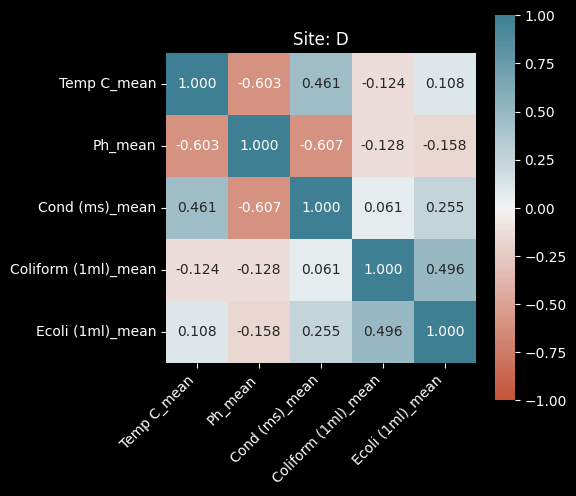

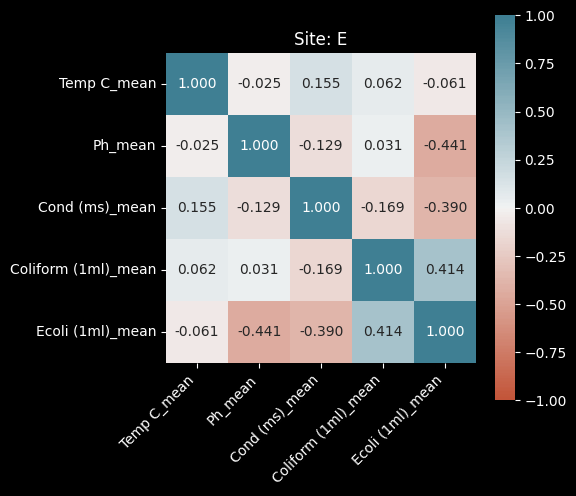

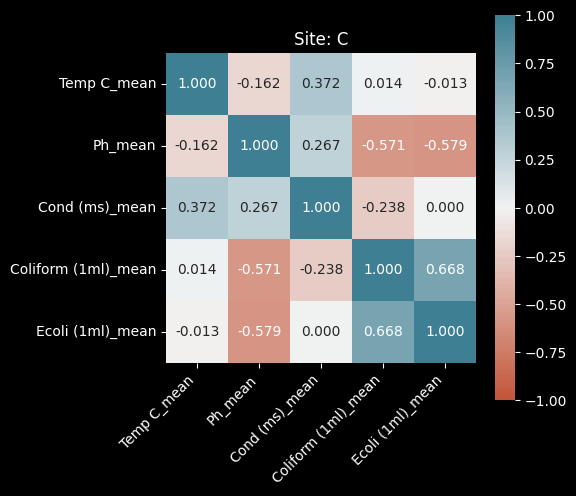

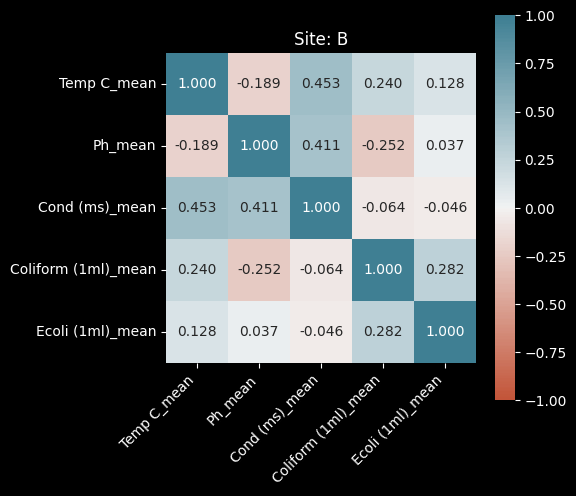

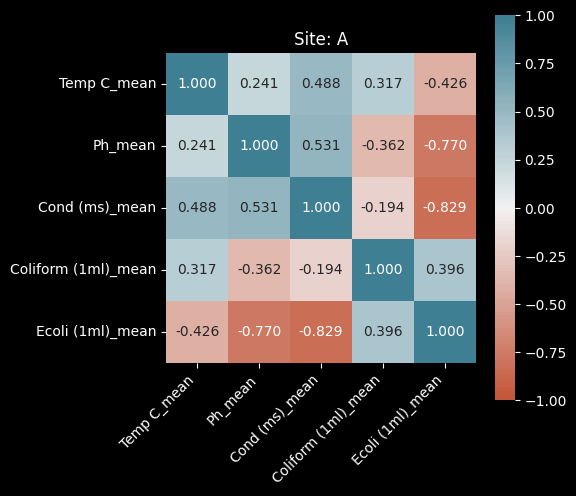

In [26]:
cols = [
    "Temp C_mean",
    "Ph_mean",
    "Cond (ms)_mean",
    "Coliform (1ml)_mean",
    "Ecoli (1ml)_mean",
]


# Pearson, used for two quantitative continuous variables which have a linear relationship
# Spearman, used for two quantitative variables if the link is partially linear, or for one qualitative ordinal variable and one quantitative variable
# Kendall, often used for two qualitative ordinal variables

for site in site_dict:
    corr = site_dict[site][cols].corr(method="pearson")

    plt.figure(figsize=(5, 5))
    plt.title("Site: " + site)
    ax = sns.heatmap(
        corr,
        vmin=-1,
        vmax=1,
        center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        fmt=".3f",
    )
    ax.set_xticklabels(
        ax.get_xticklabels(), rotation=45, horizontalalignment="right"
    )

## Scatter Plots

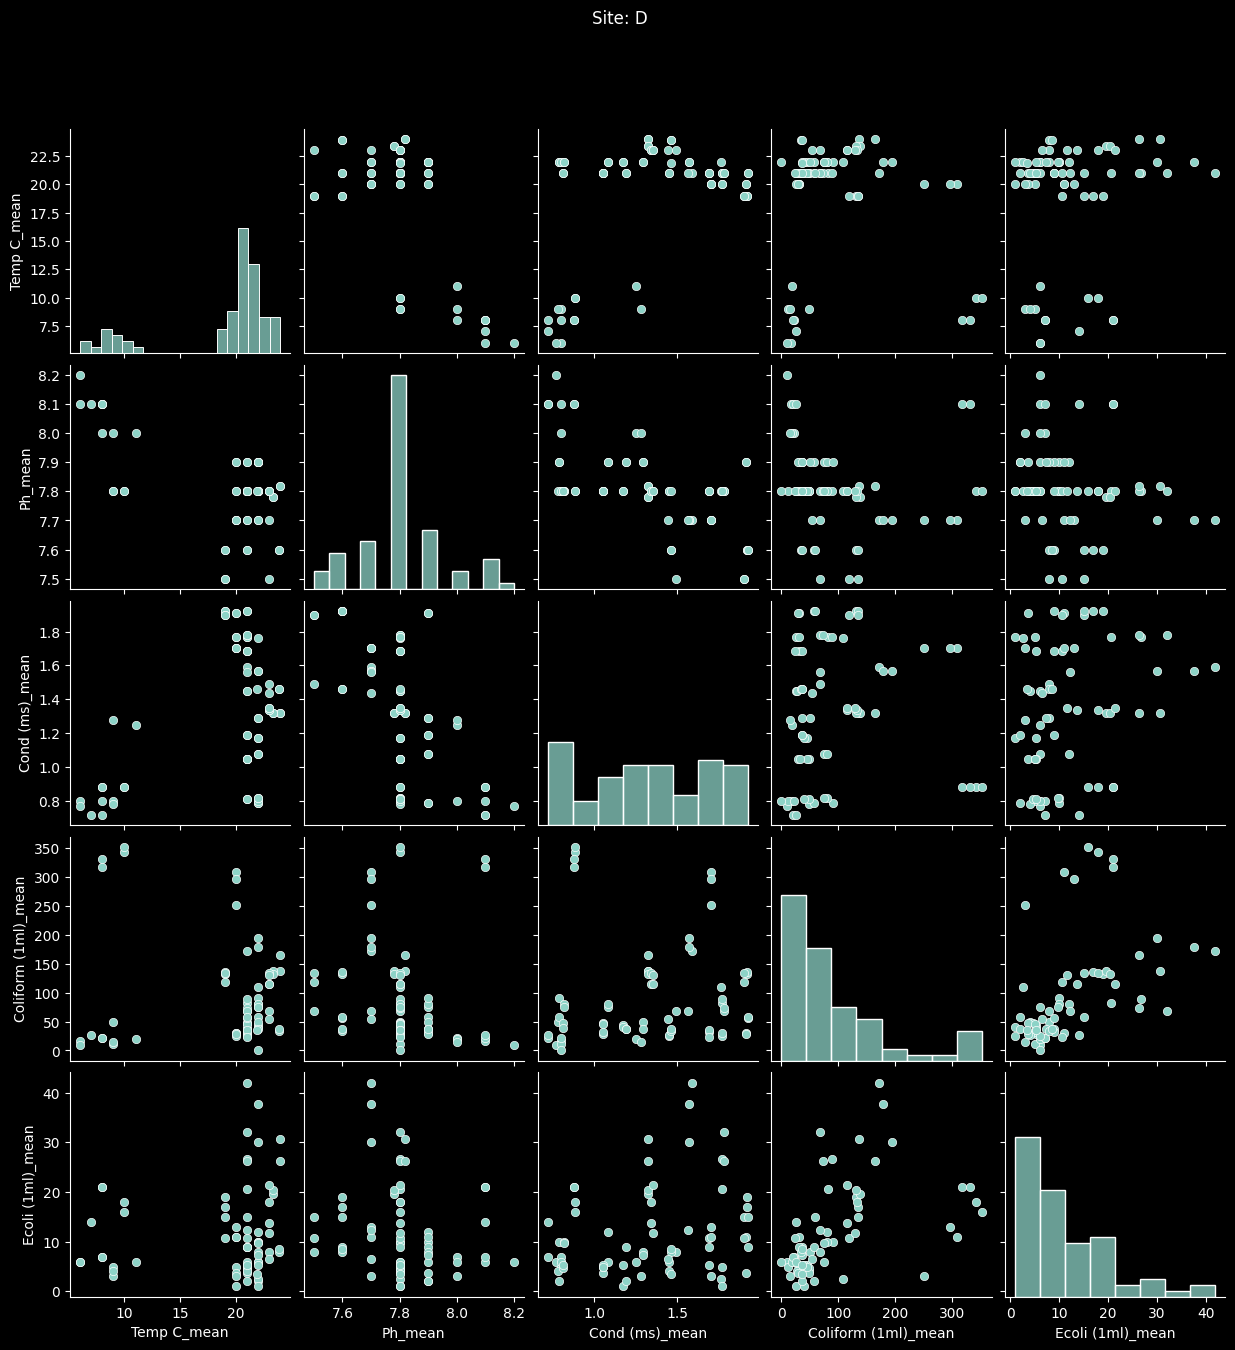

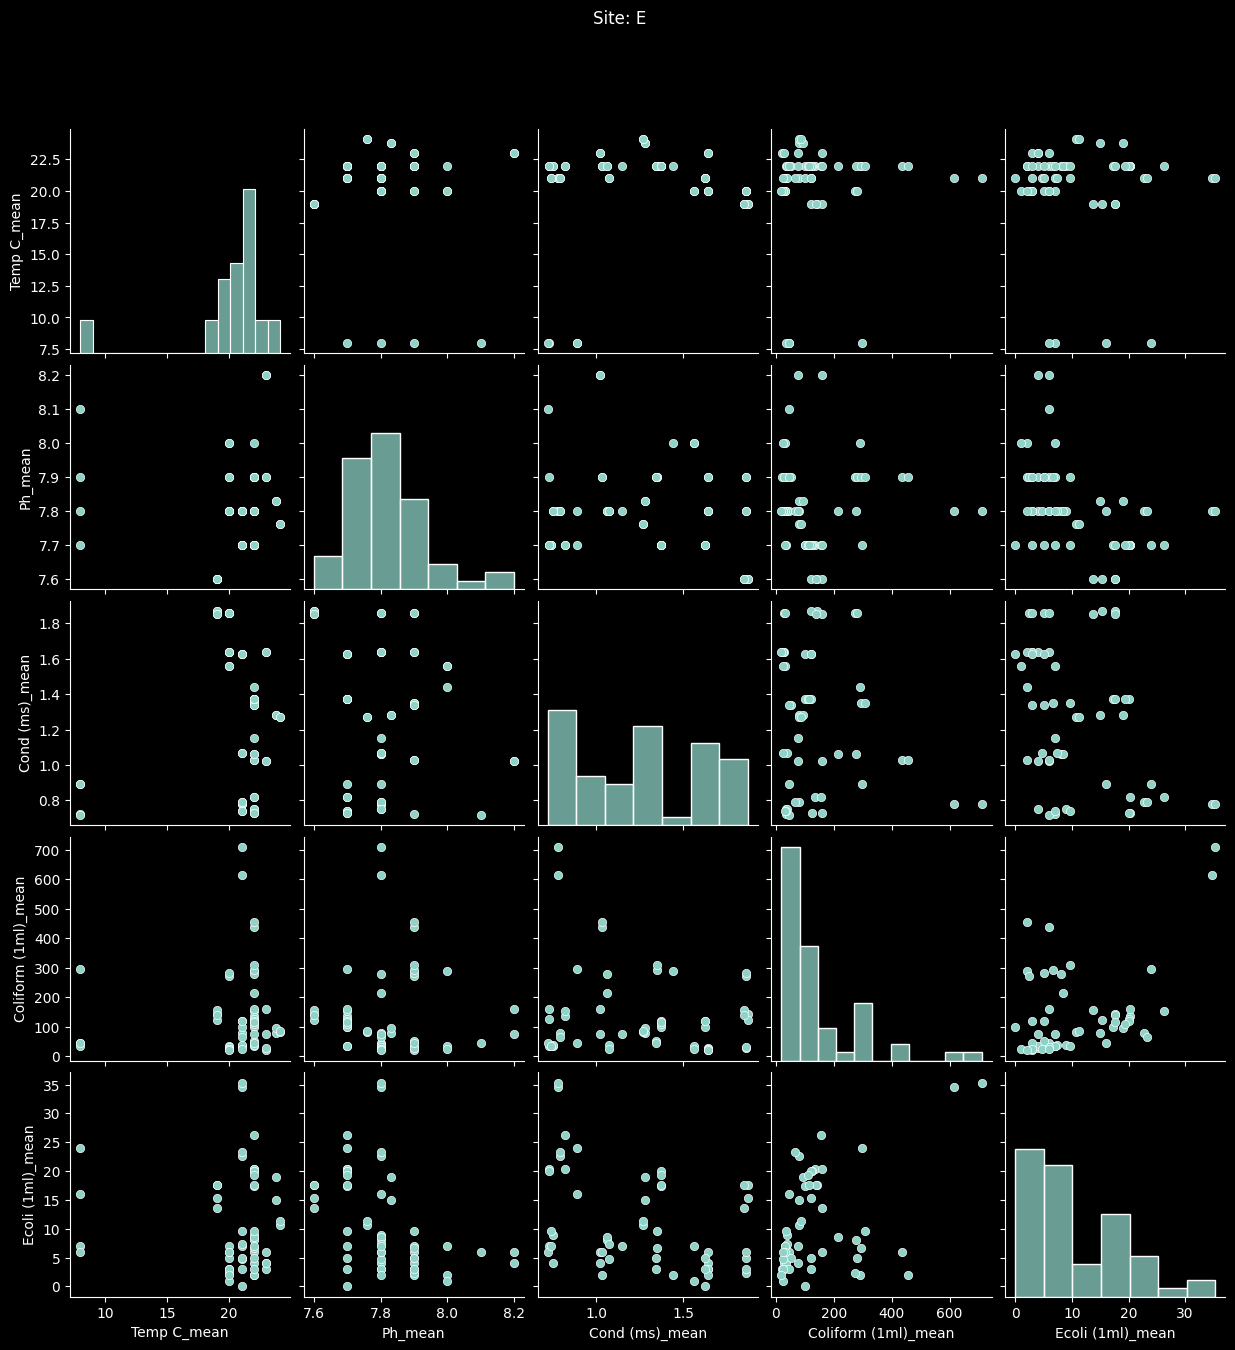

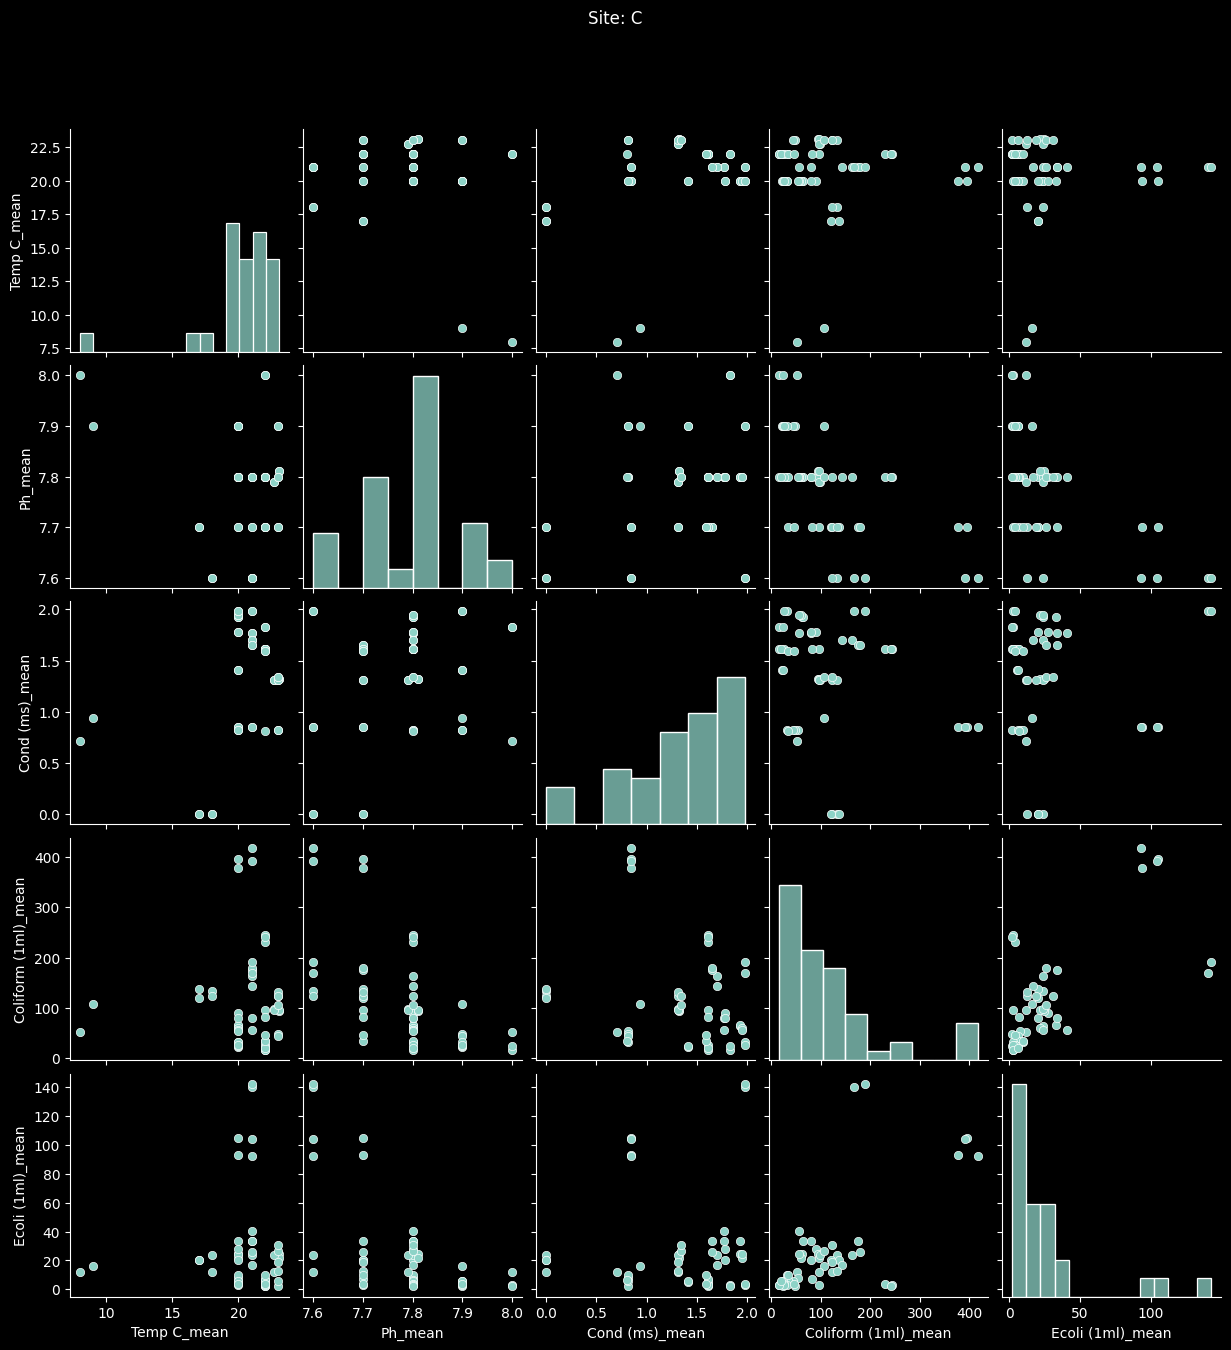

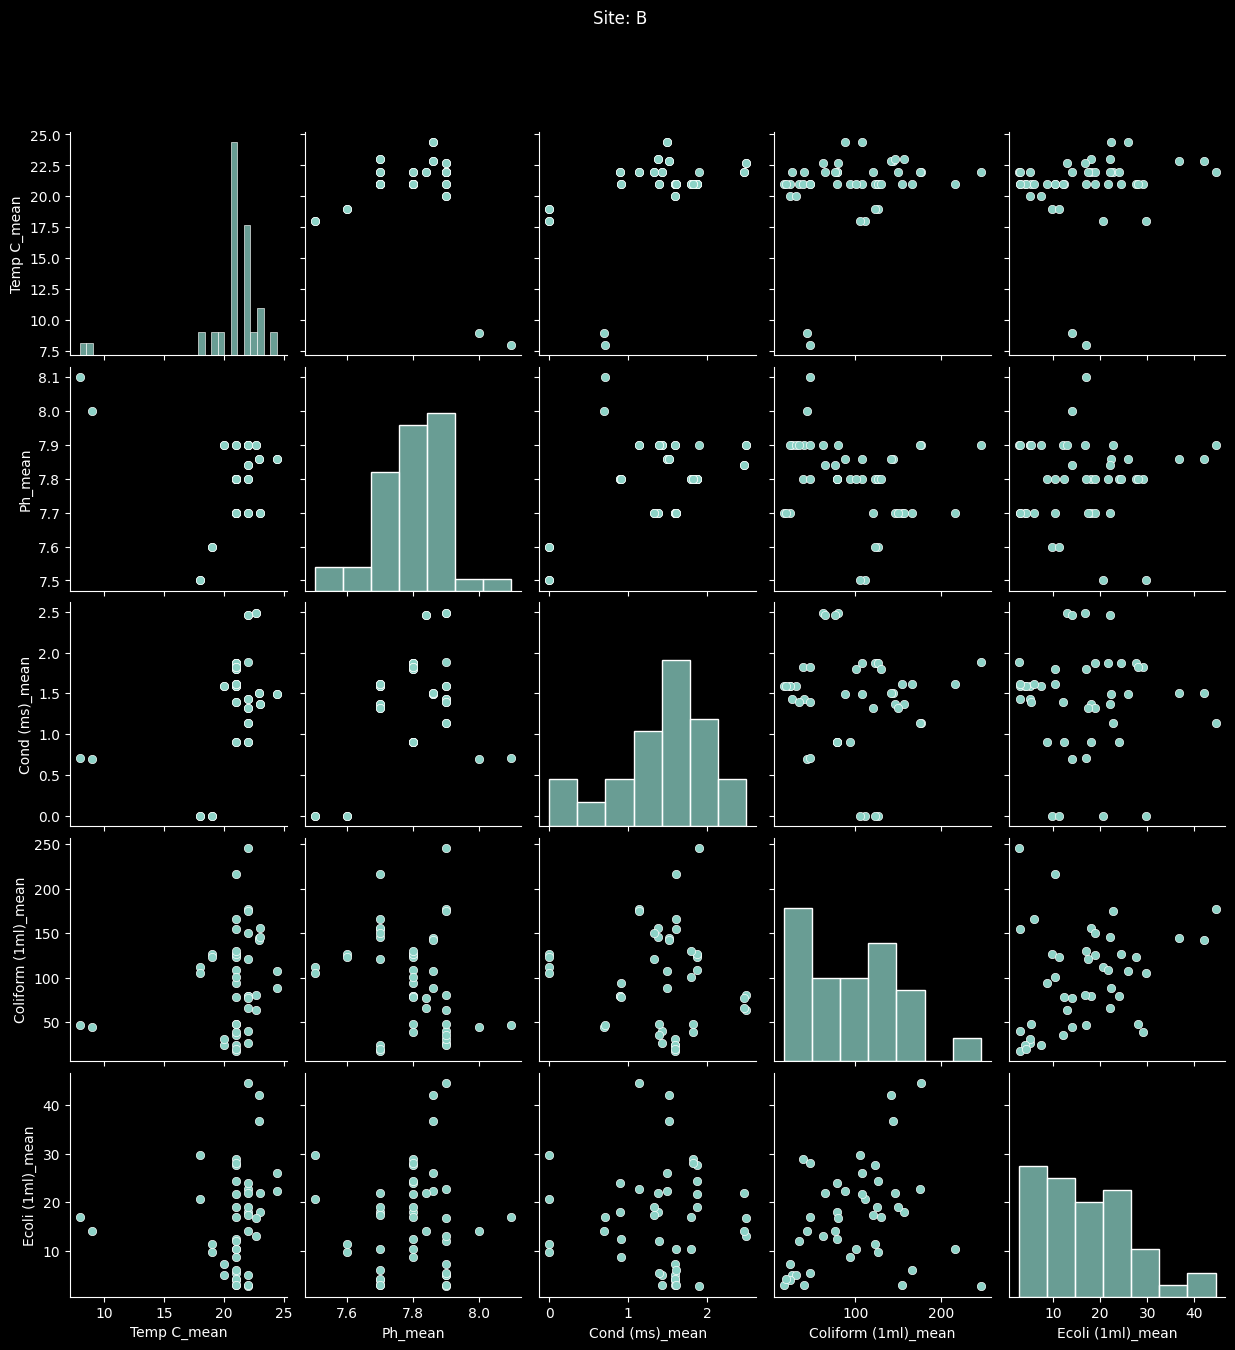

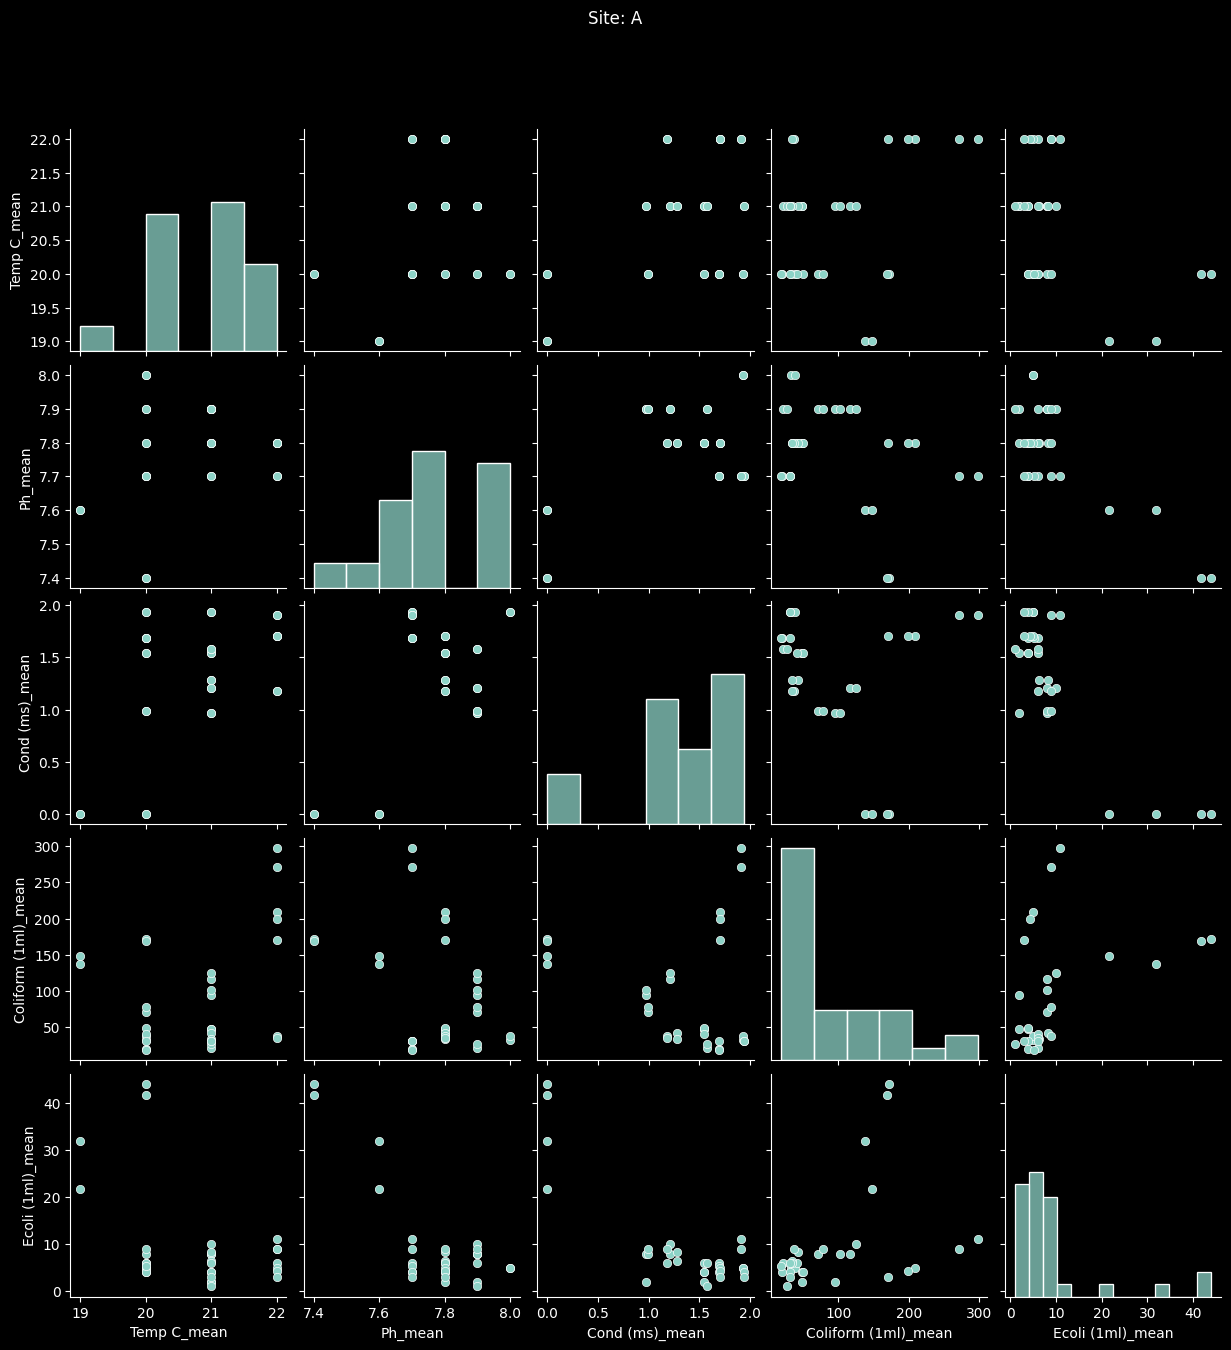

In [27]:
cols = [
    "Temp C_mean",
    "Ph_mean",
    "Cond (ms)_mean",
    "Coliform (1ml)_mean",
    "Ecoli (1ml)_mean",
]

for site in site_dict:
    plot = sns.pairplot(data=site_dict[site][cols])
    plot.fig.suptitle("Site: " + site, y=1.08)

## Boxplots

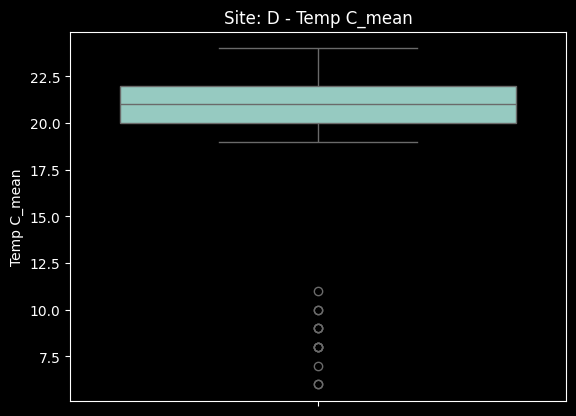

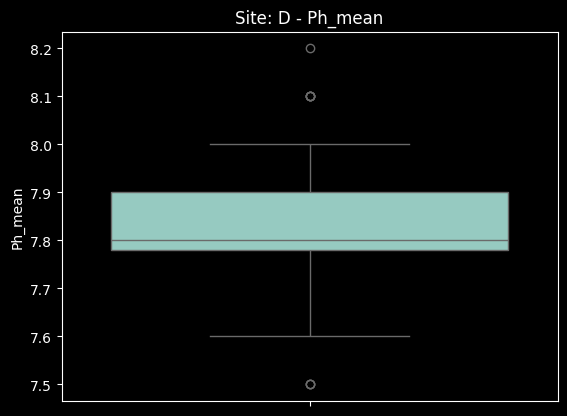

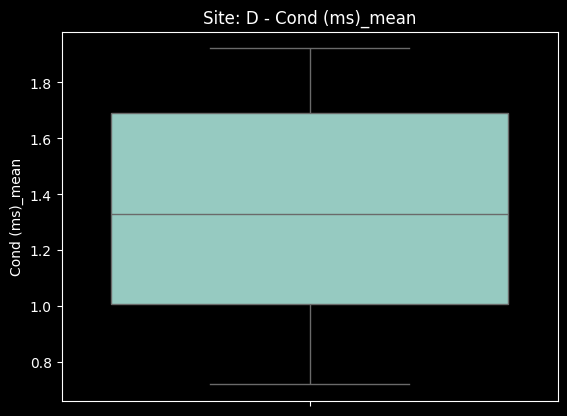

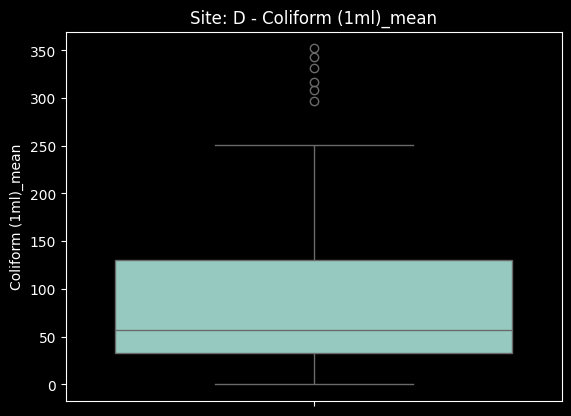

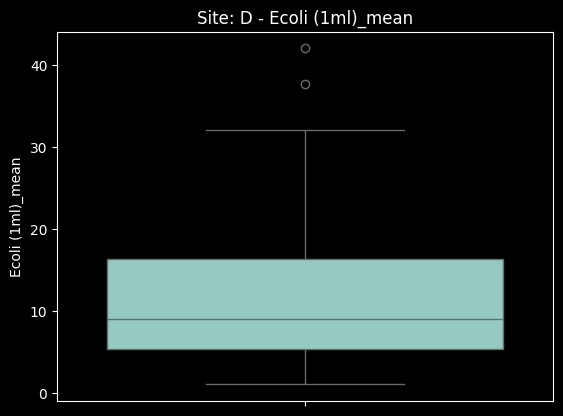

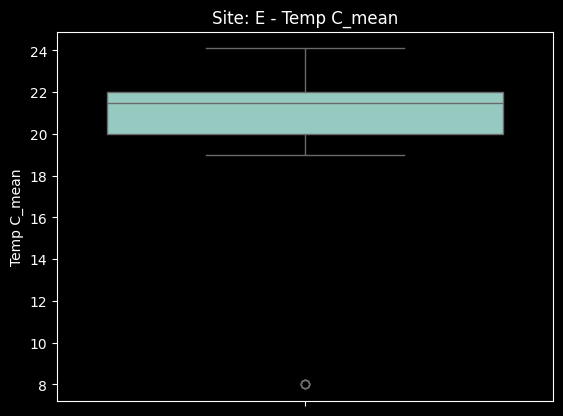

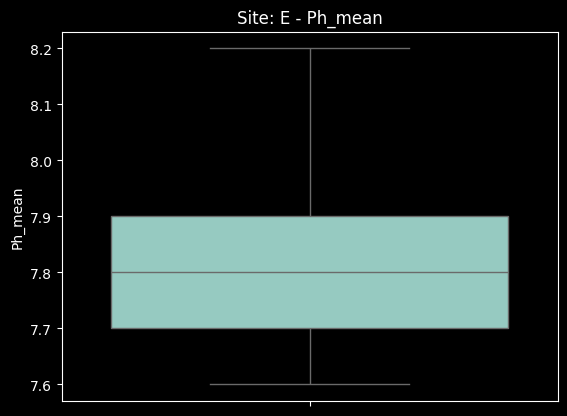

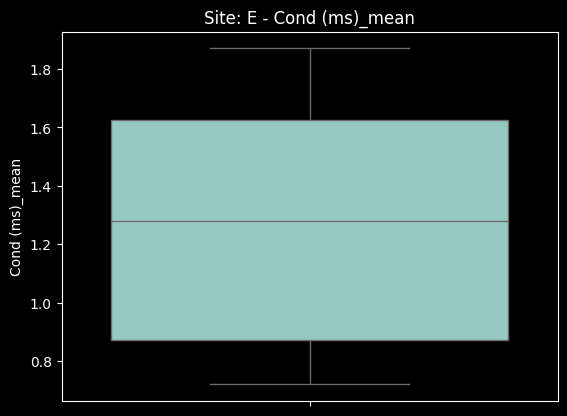

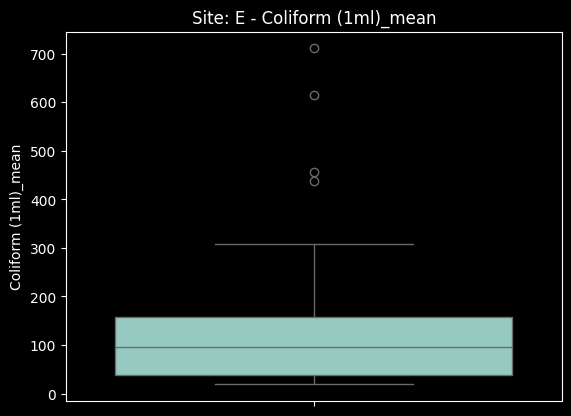

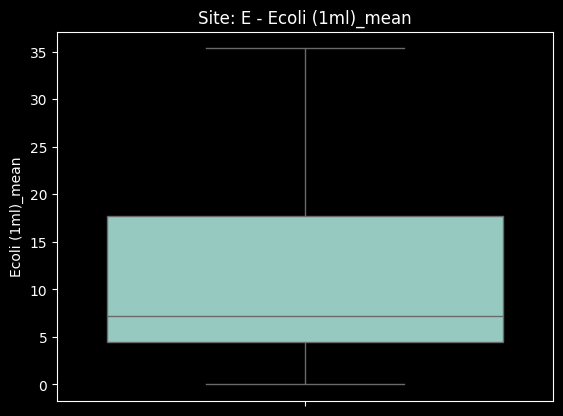

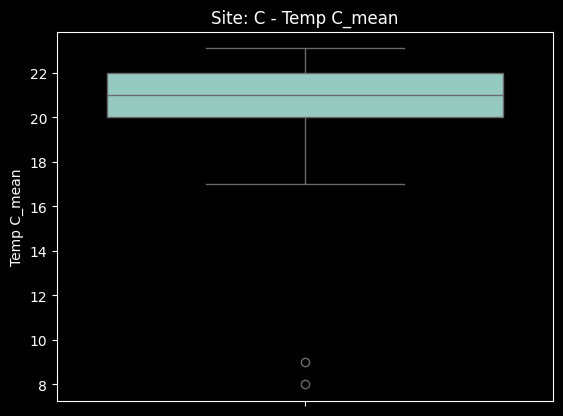

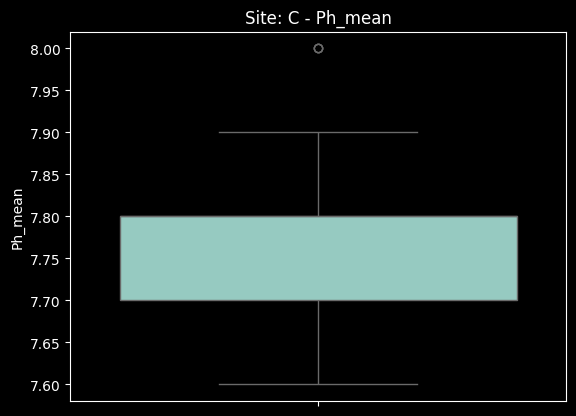

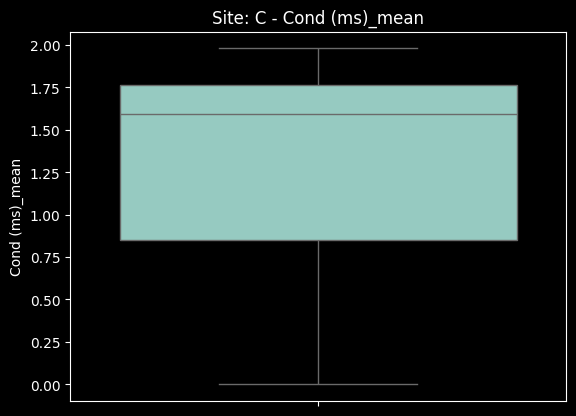

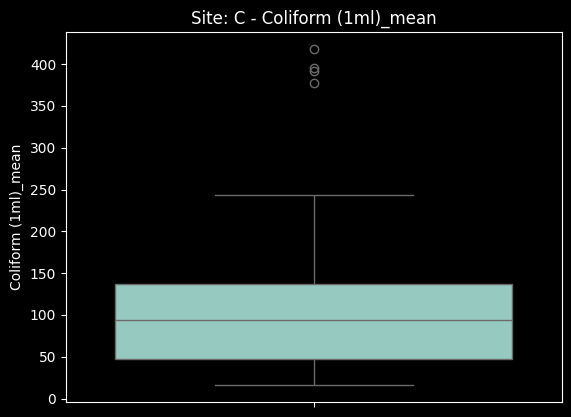

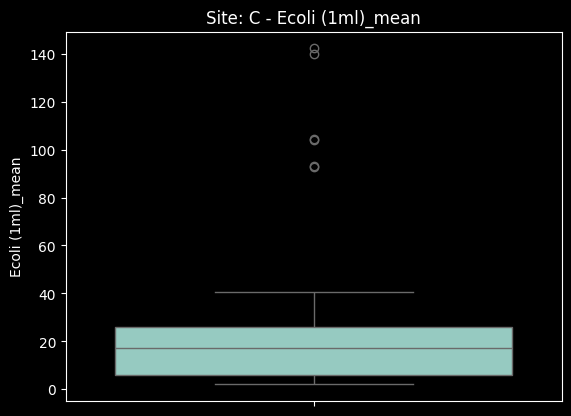

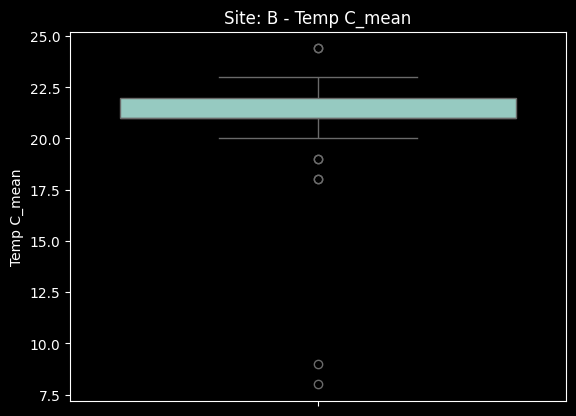

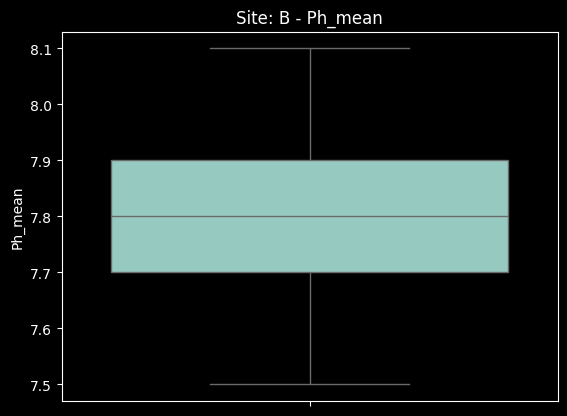

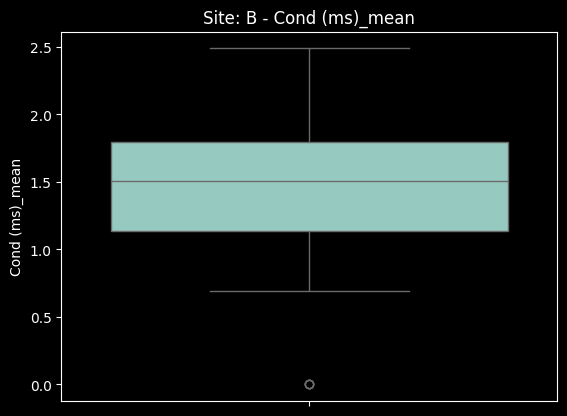

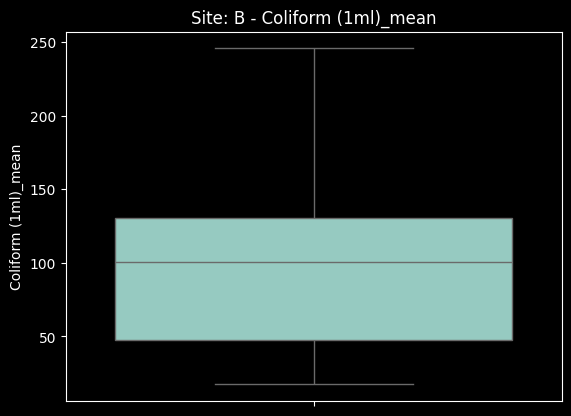

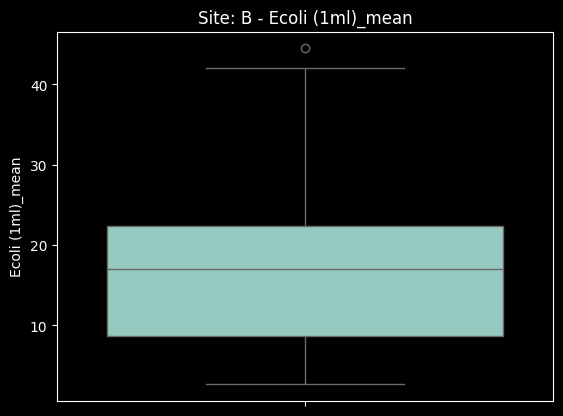

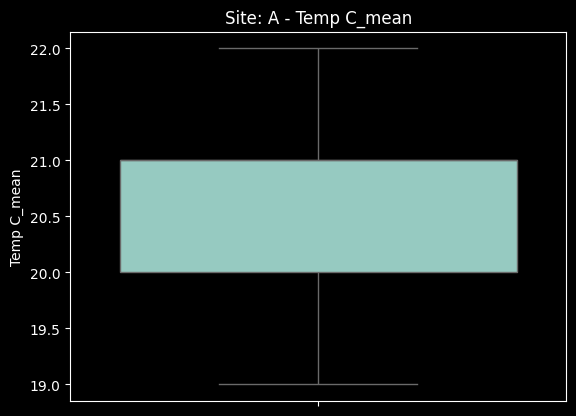

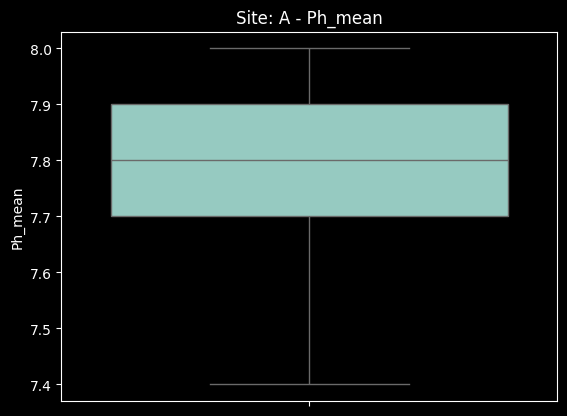

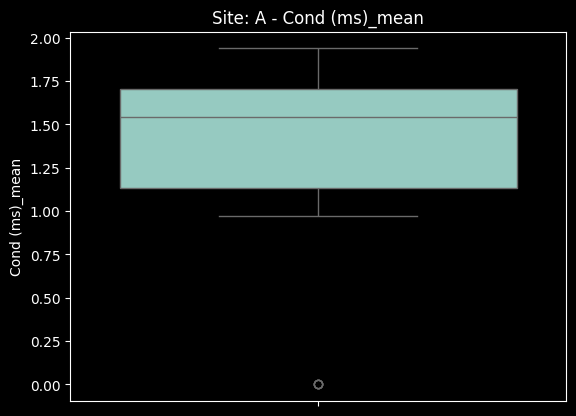

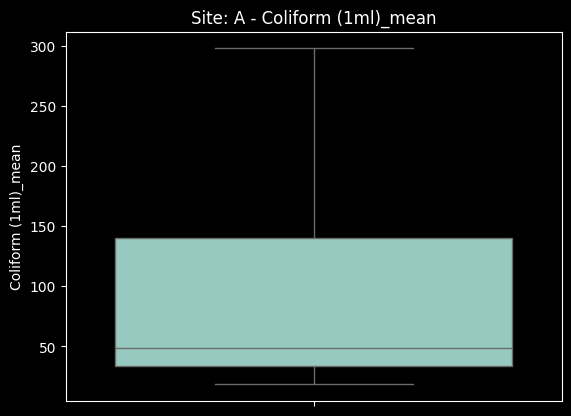

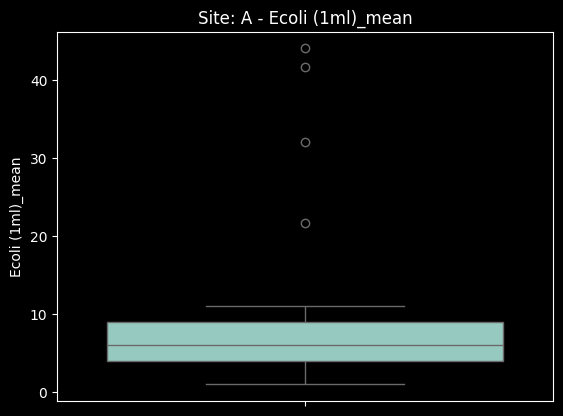

In [28]:
cols = [
    "Temp C_mean",
    "Ph_mean",
    "Cond (ms)_mean",
    "Coliform (1ml)_mean",
    "Ecoli (1ml)_mean",
]

for site in site_dict:
    for col in cols:
        sns.boxplot(y=site_dict[site][col], orient="v")
        plt.title("Site: " + site + " - " + col)
        plt.show()

## Timeseries

/Users/massimilianoarca/Library/Caches/pypoetry/virtualenvs/thames-XkegVY7k-py3.12/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


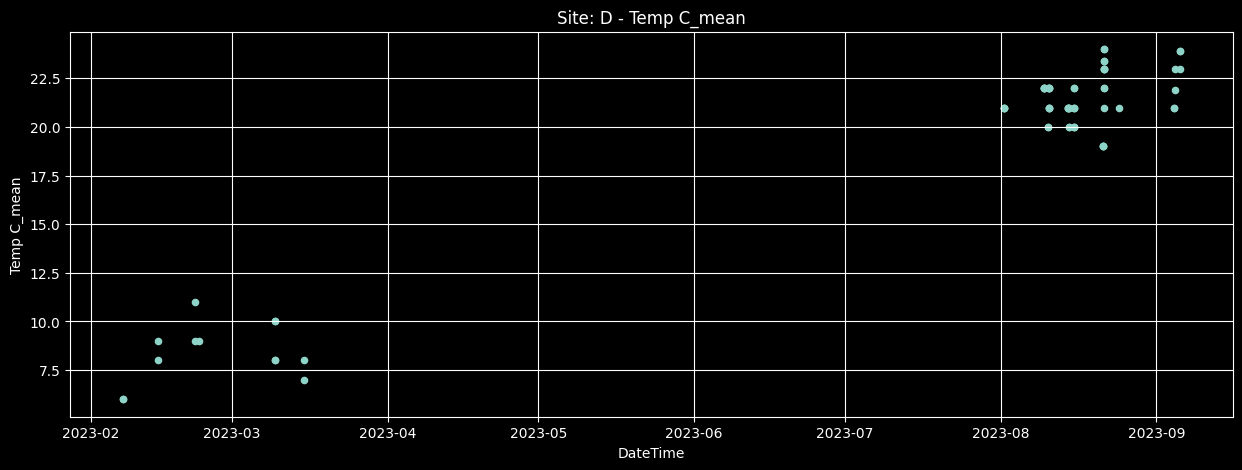

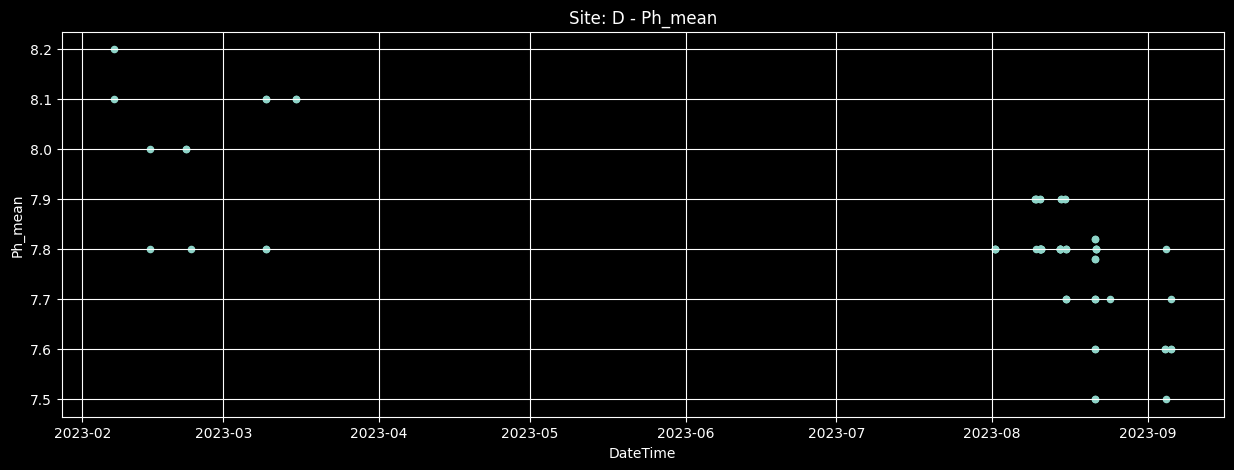

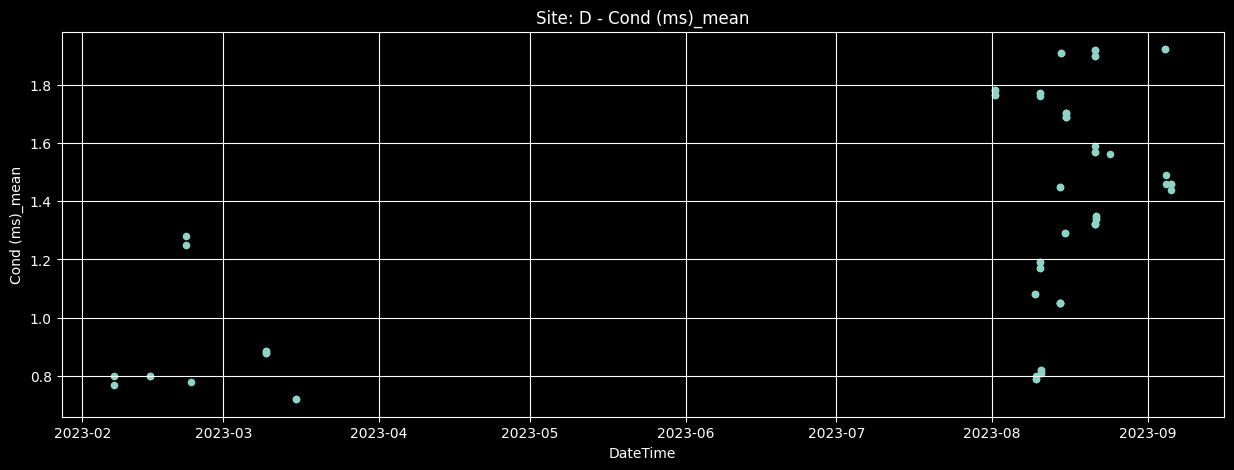

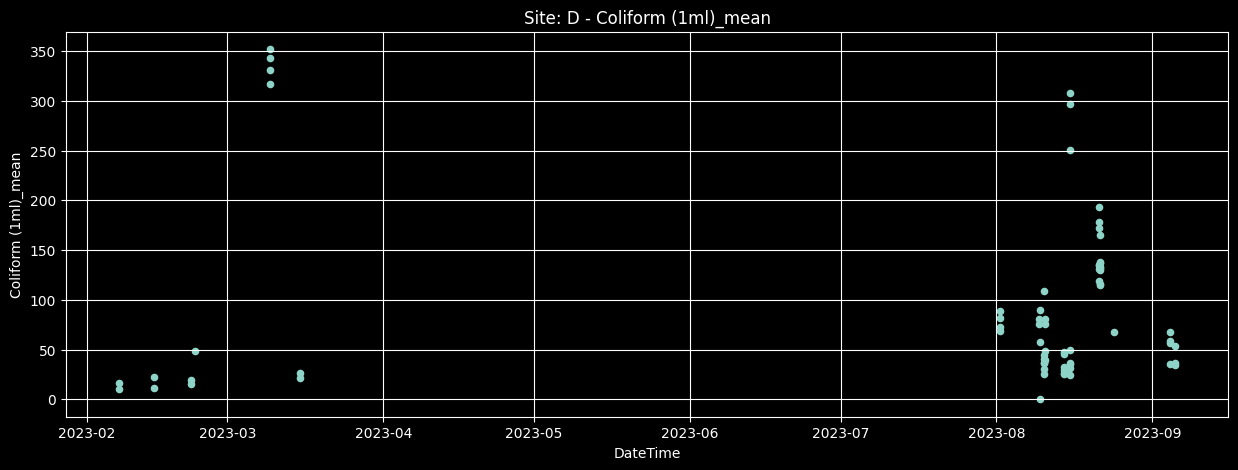

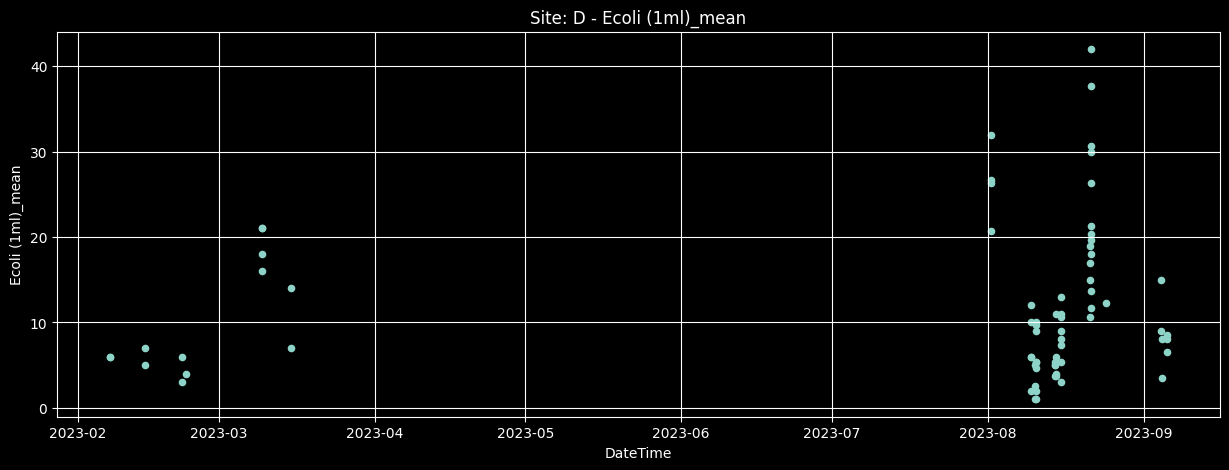

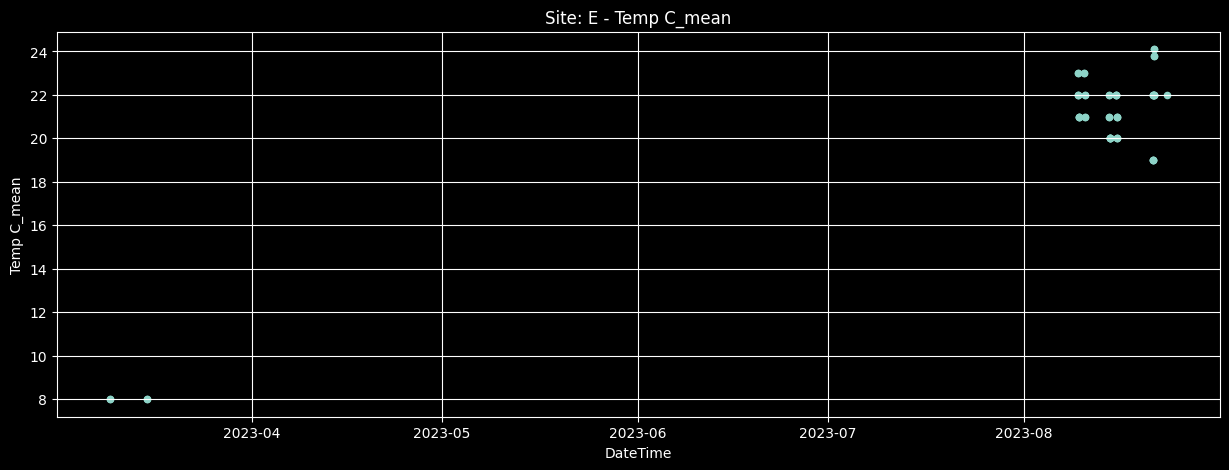

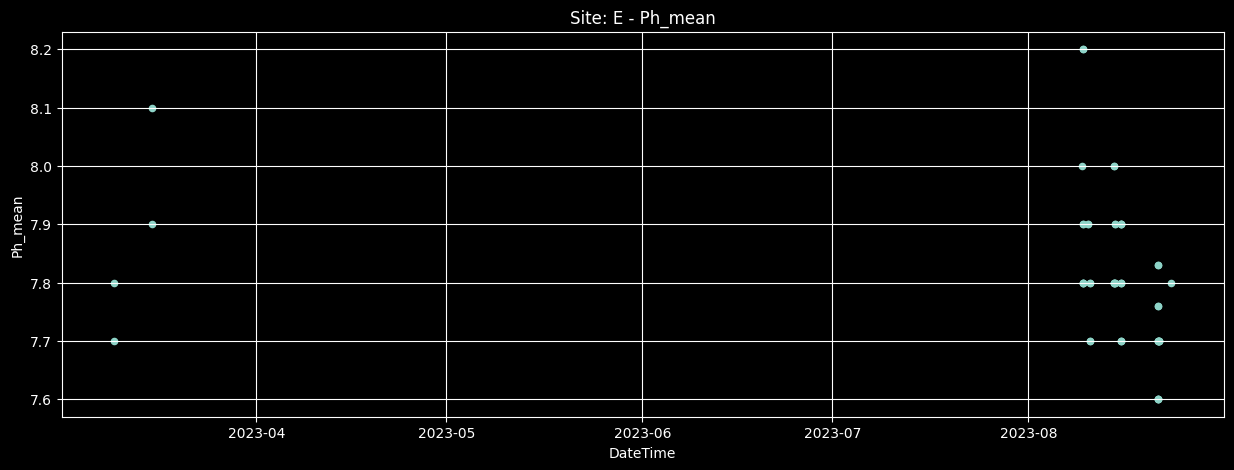

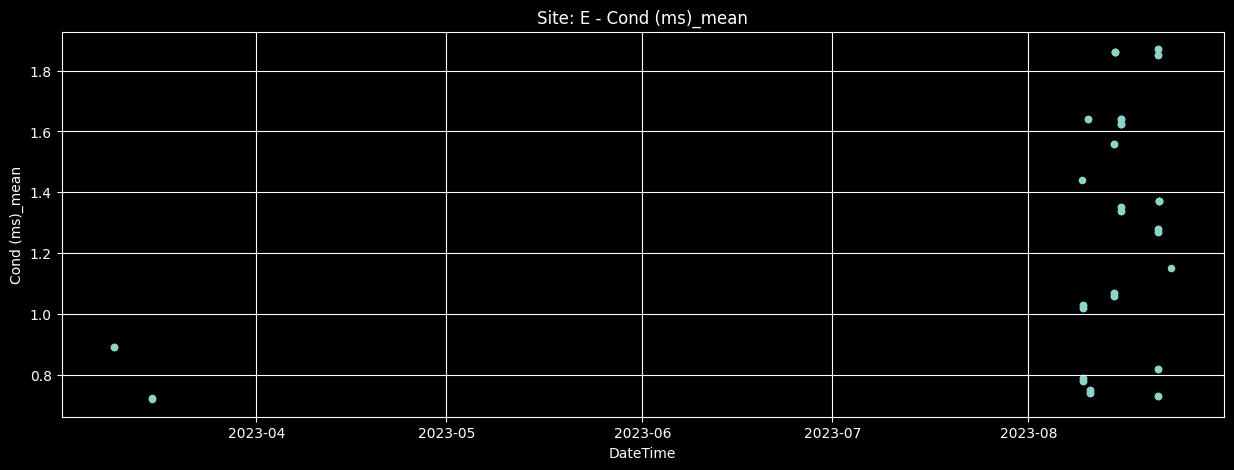

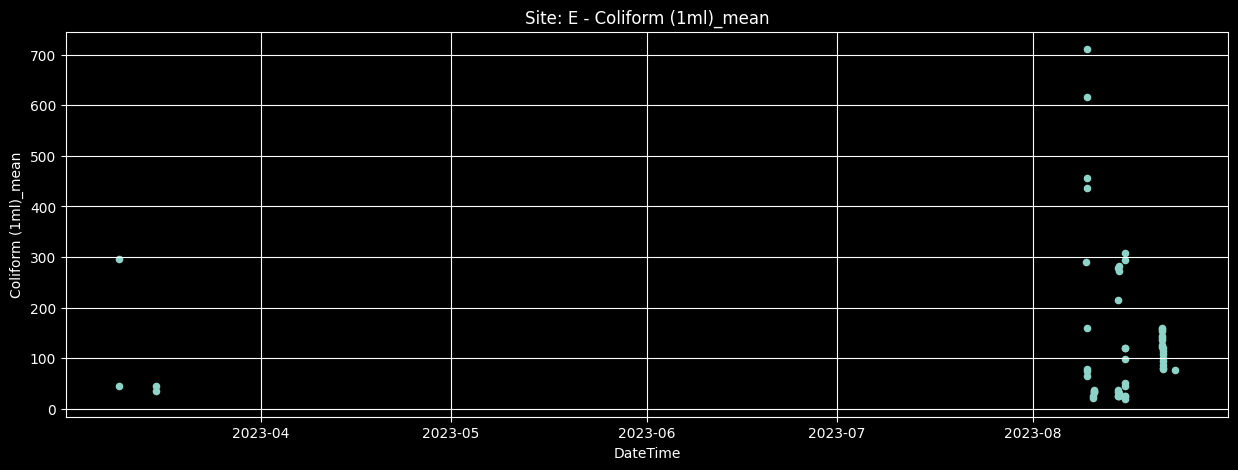

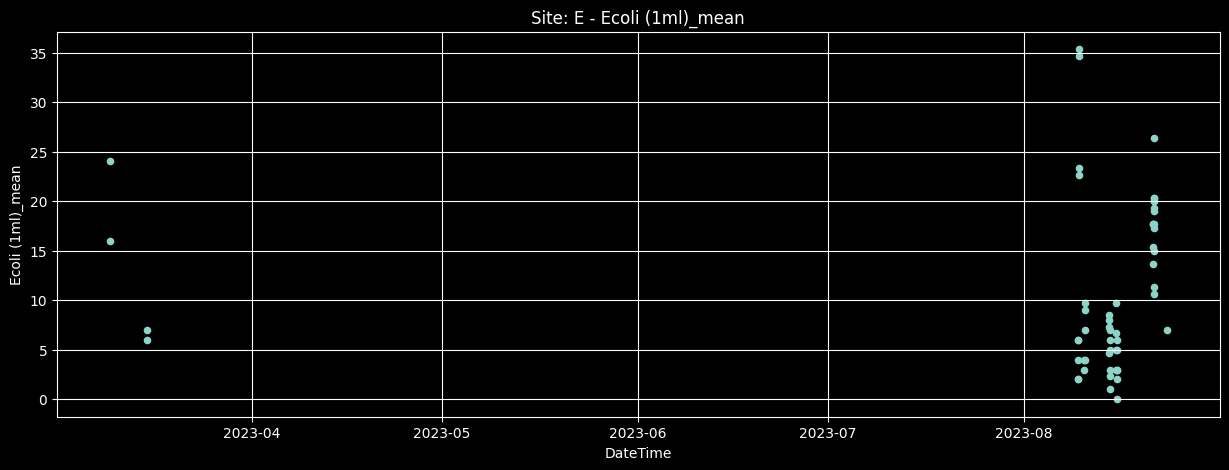

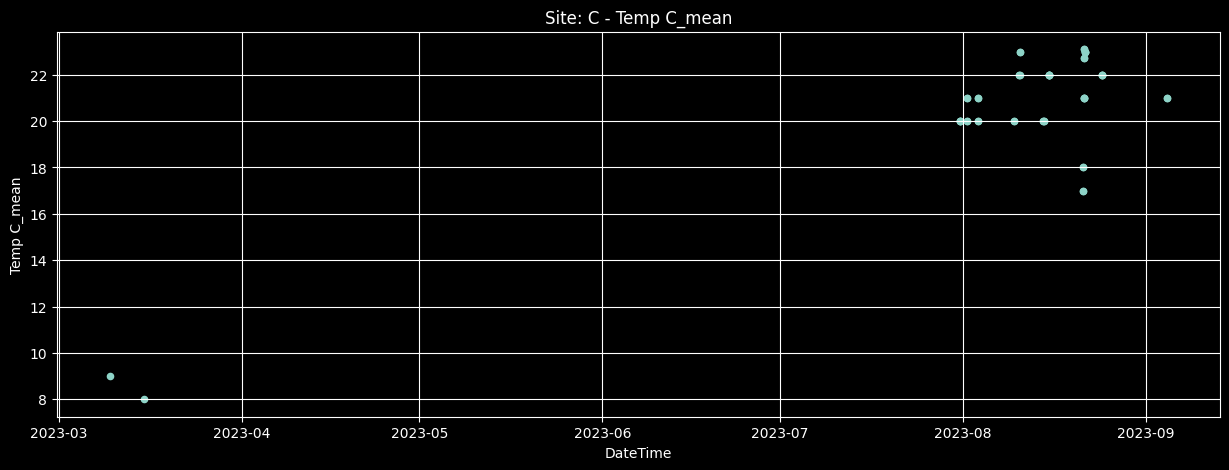

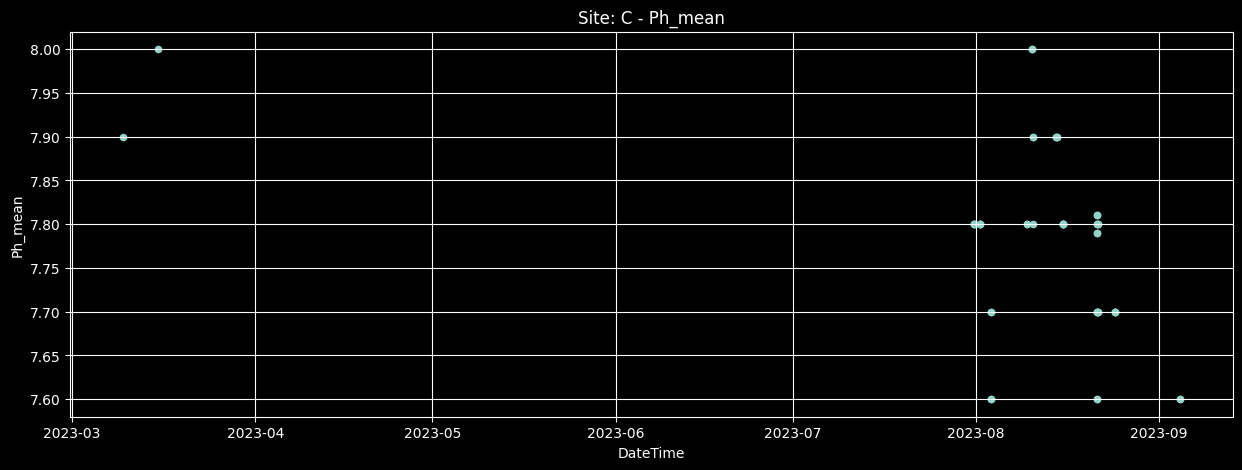

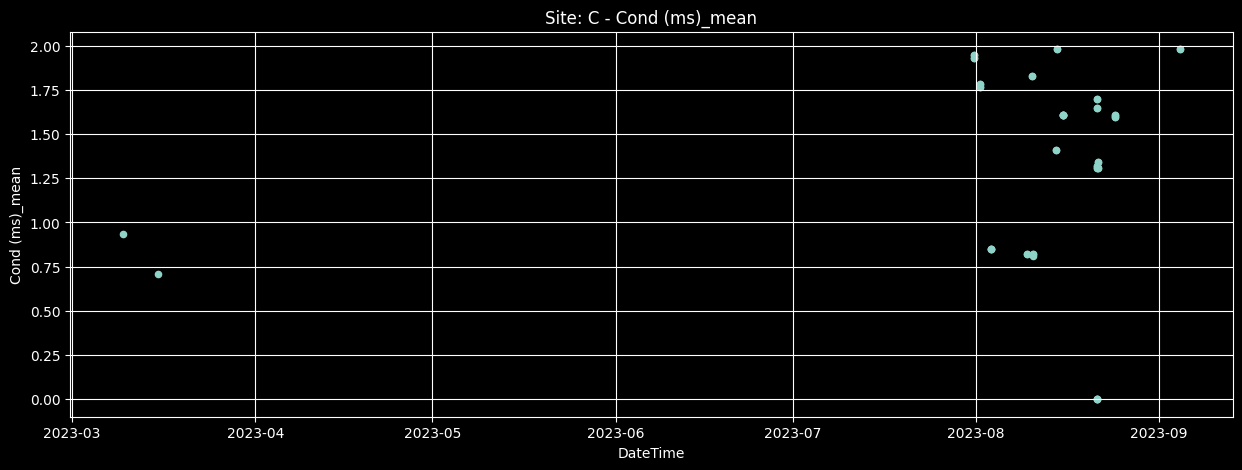

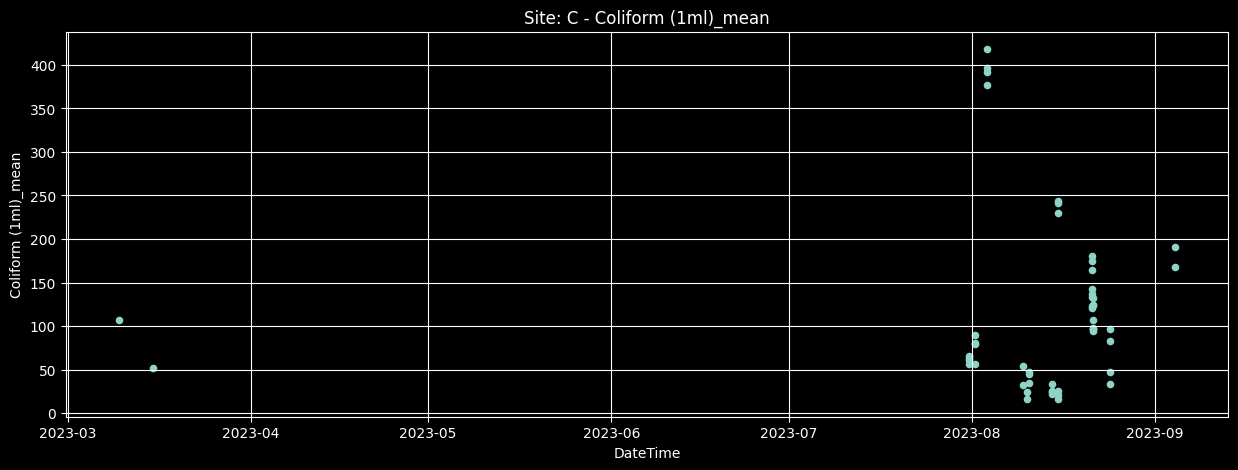

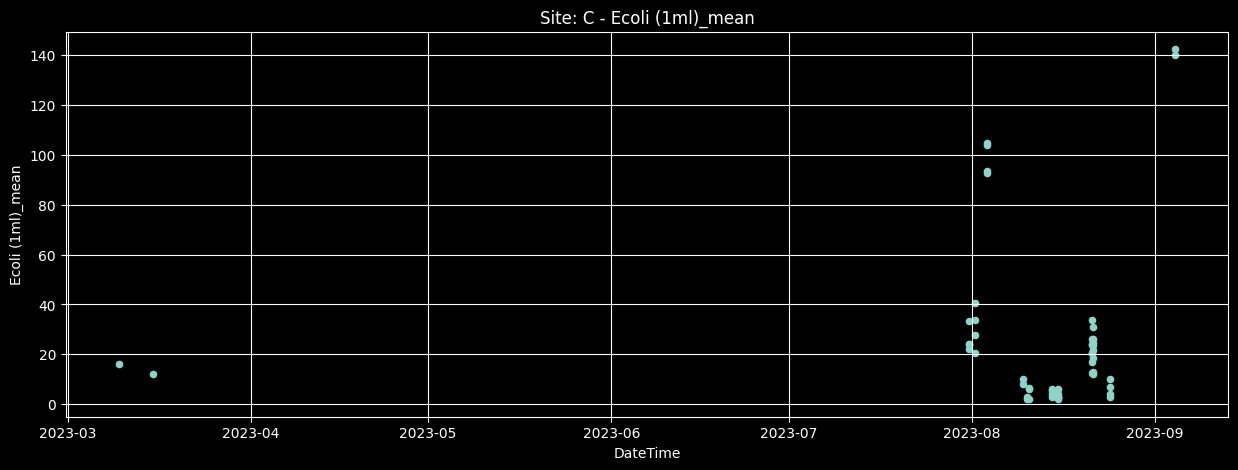

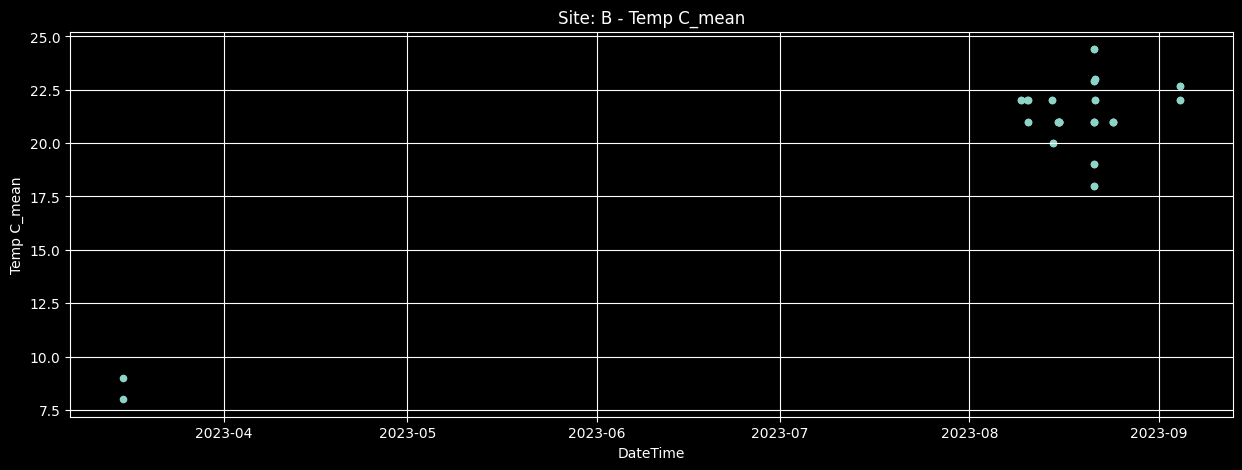

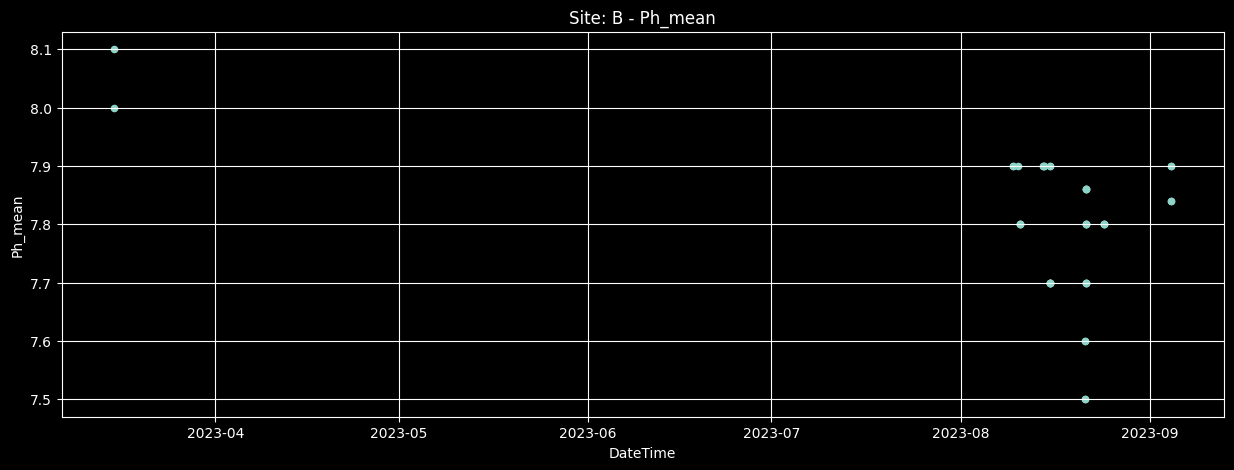

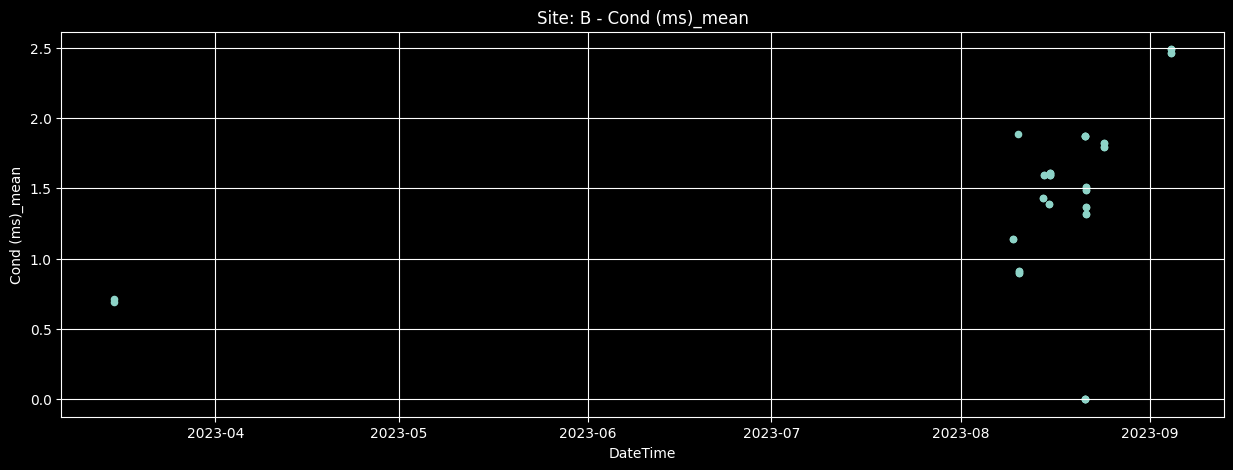

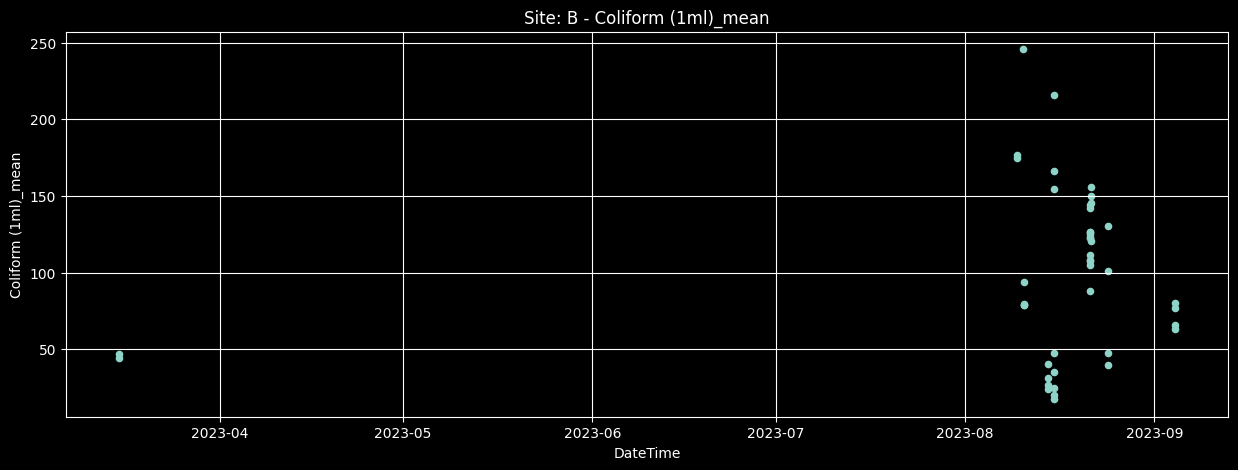

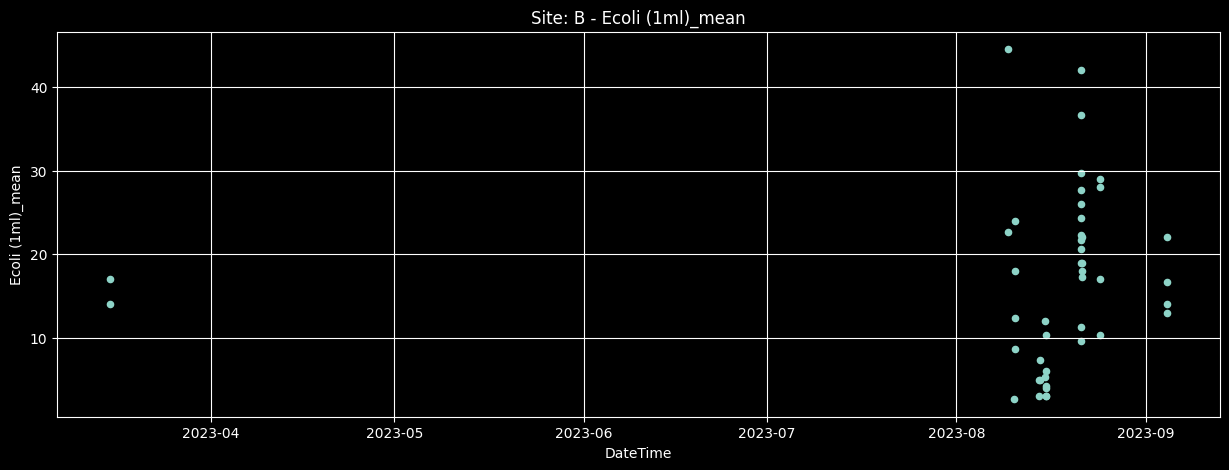

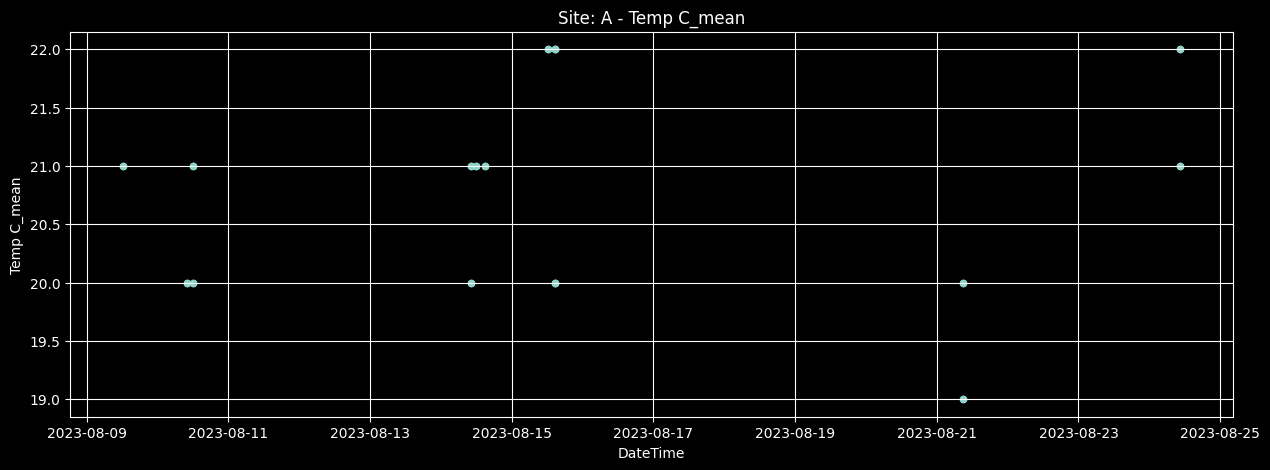

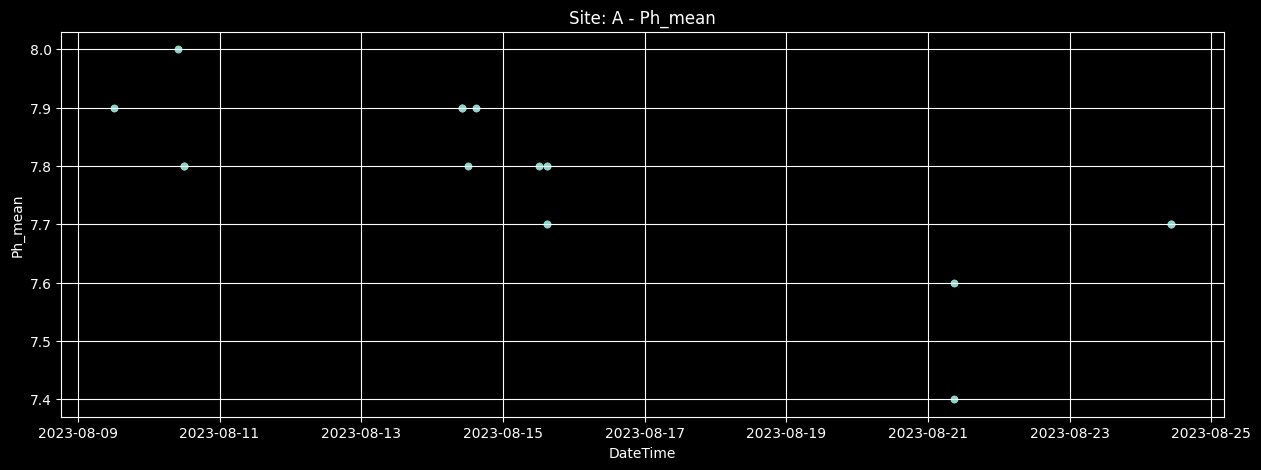

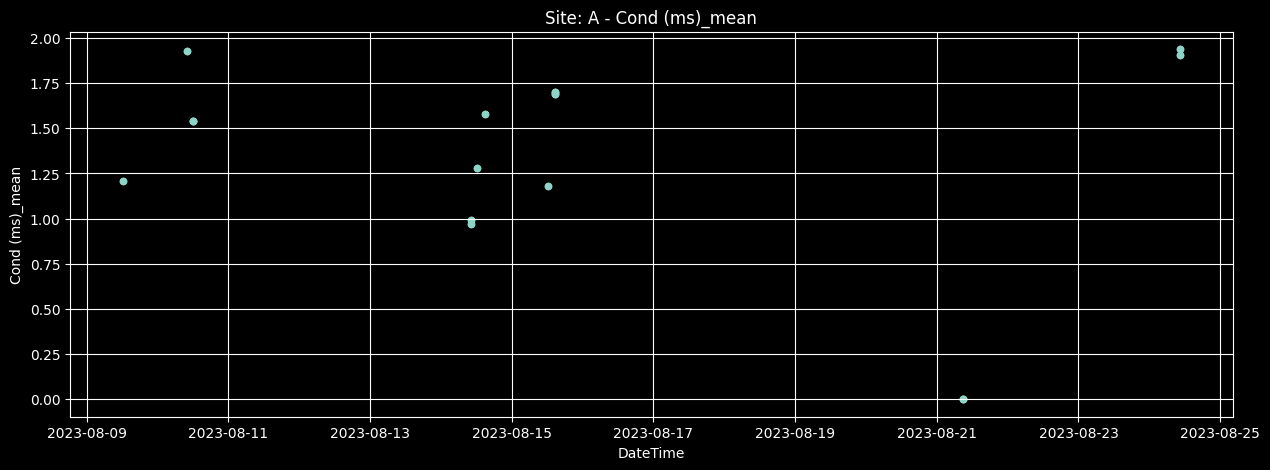

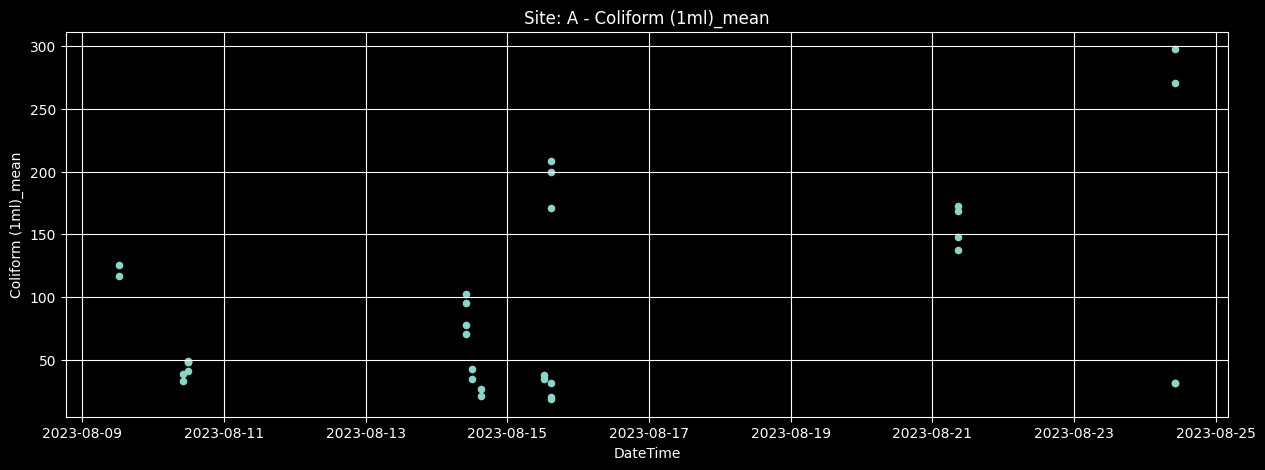

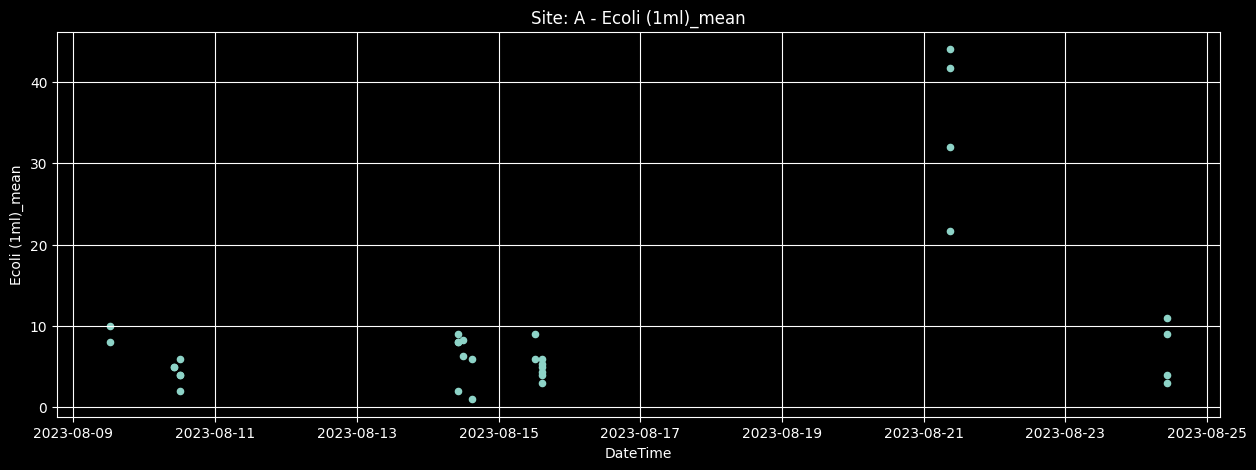

In [29]:
for site in site_dict:
    for col in cols:
        site_dict[site].plot(
            x="DateTime", y=col, figsize=(15, 5), grid=True, kind="scatter"
        )
        plt.title("Site: " + site + " - " + col)

## Check Input Distribution Difference TNTC/noTNTC

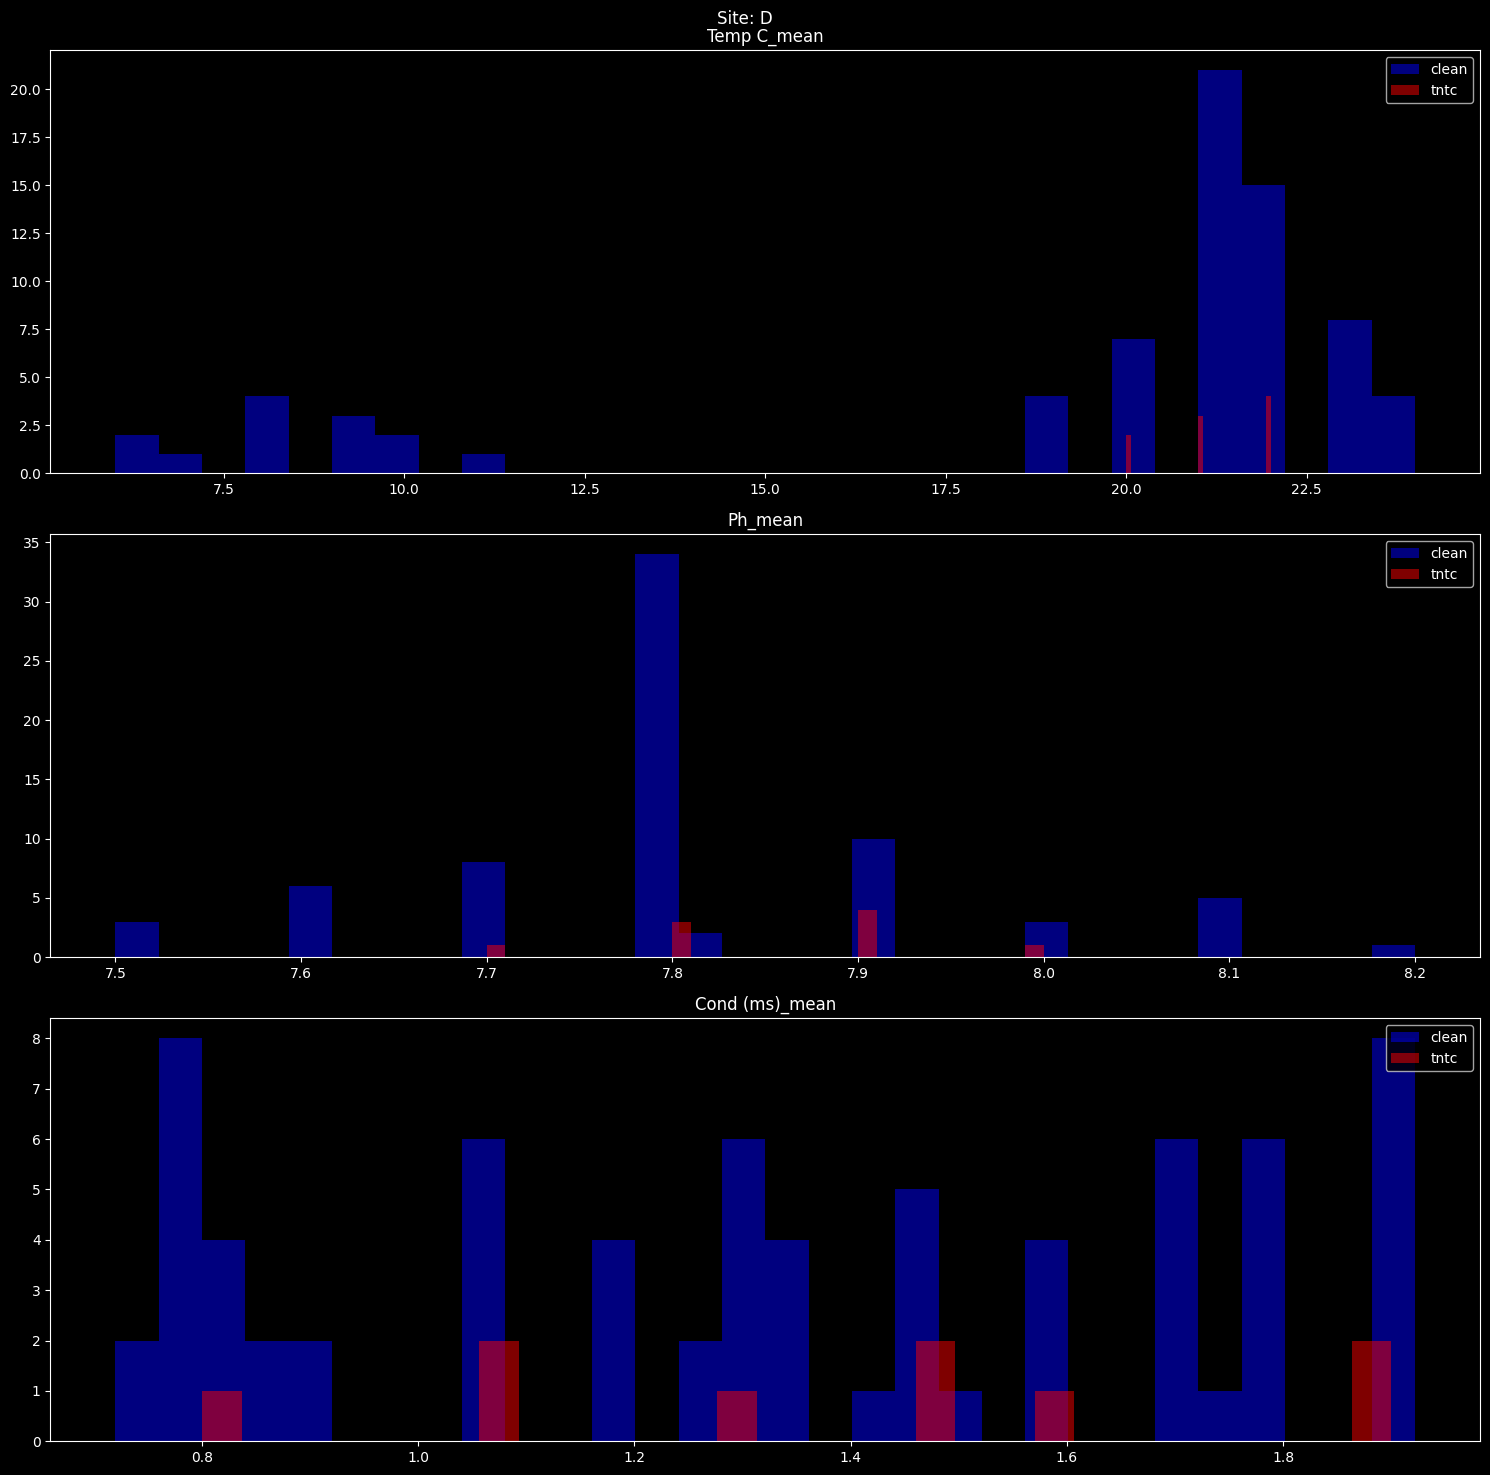

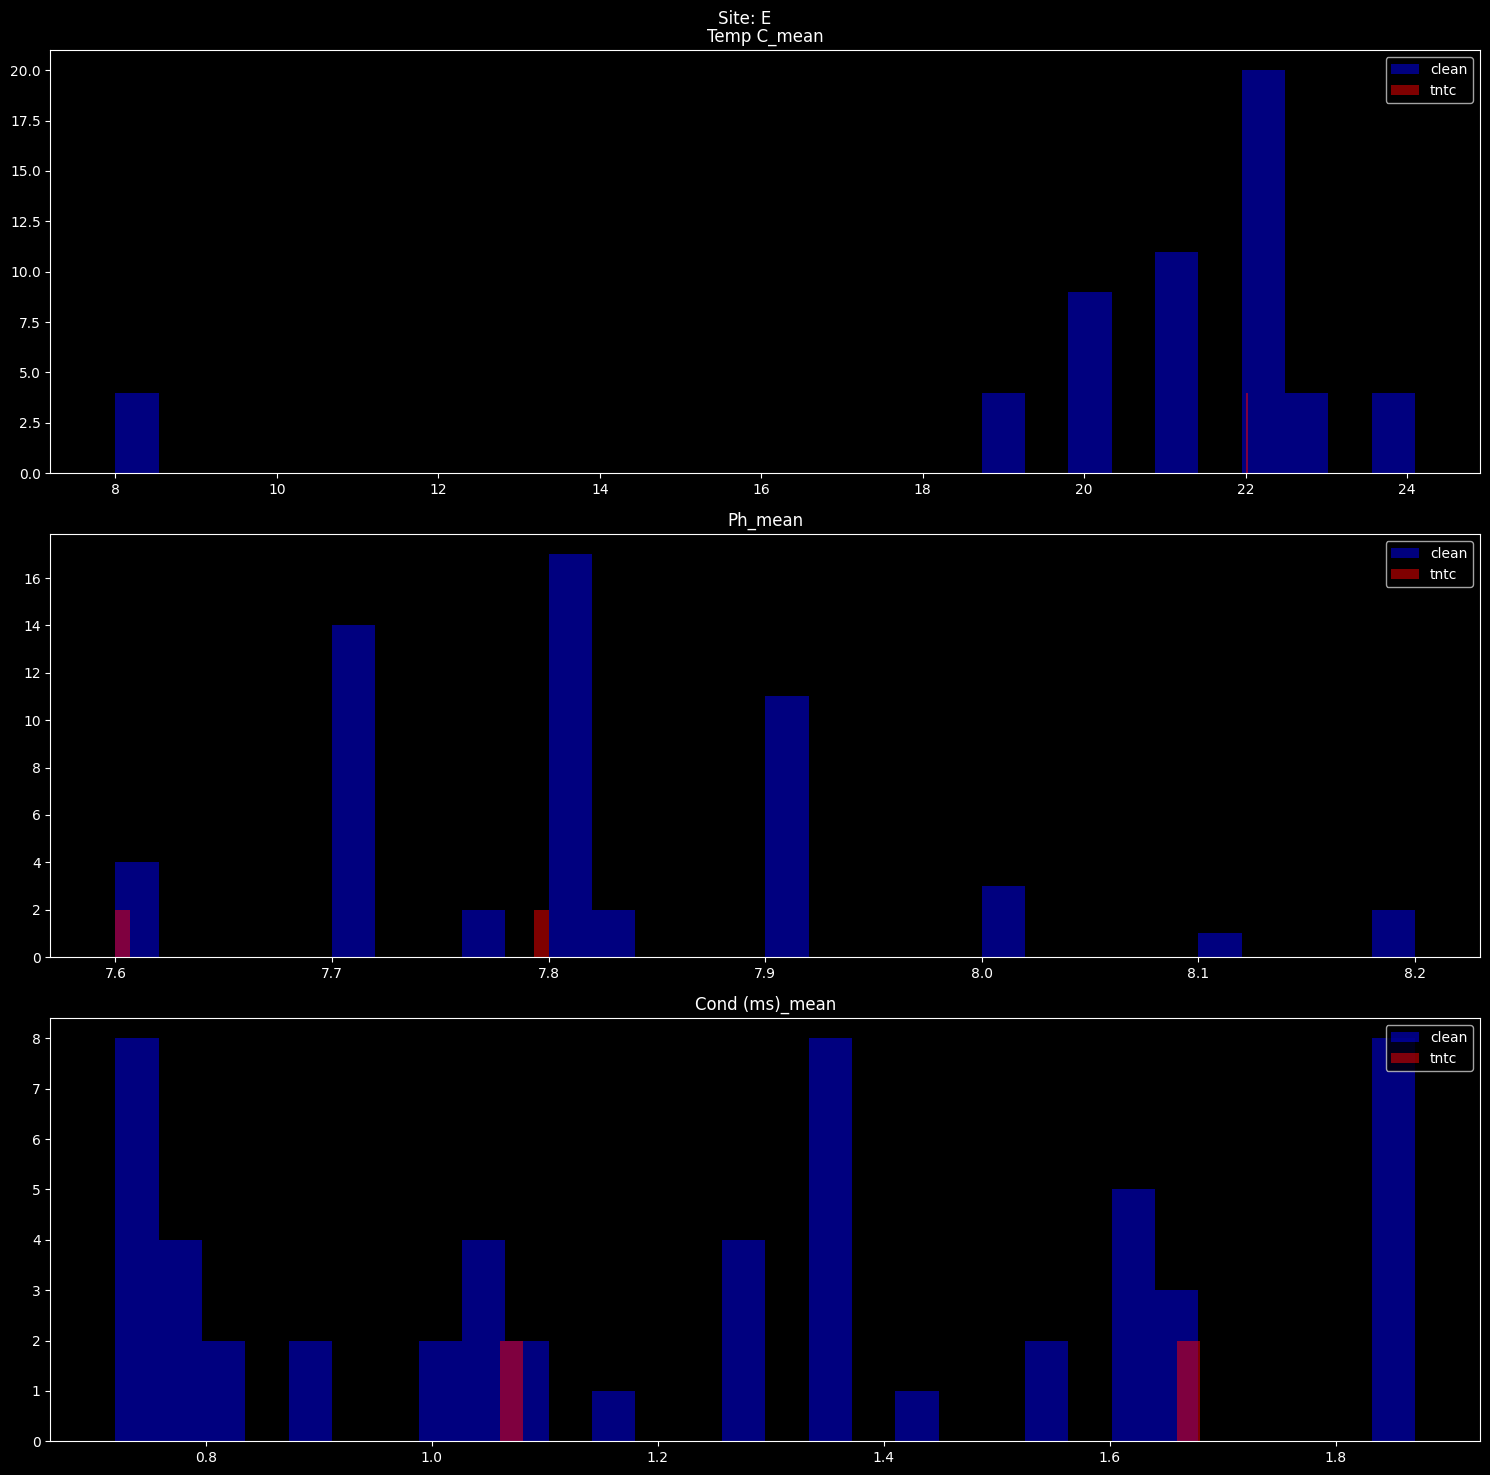

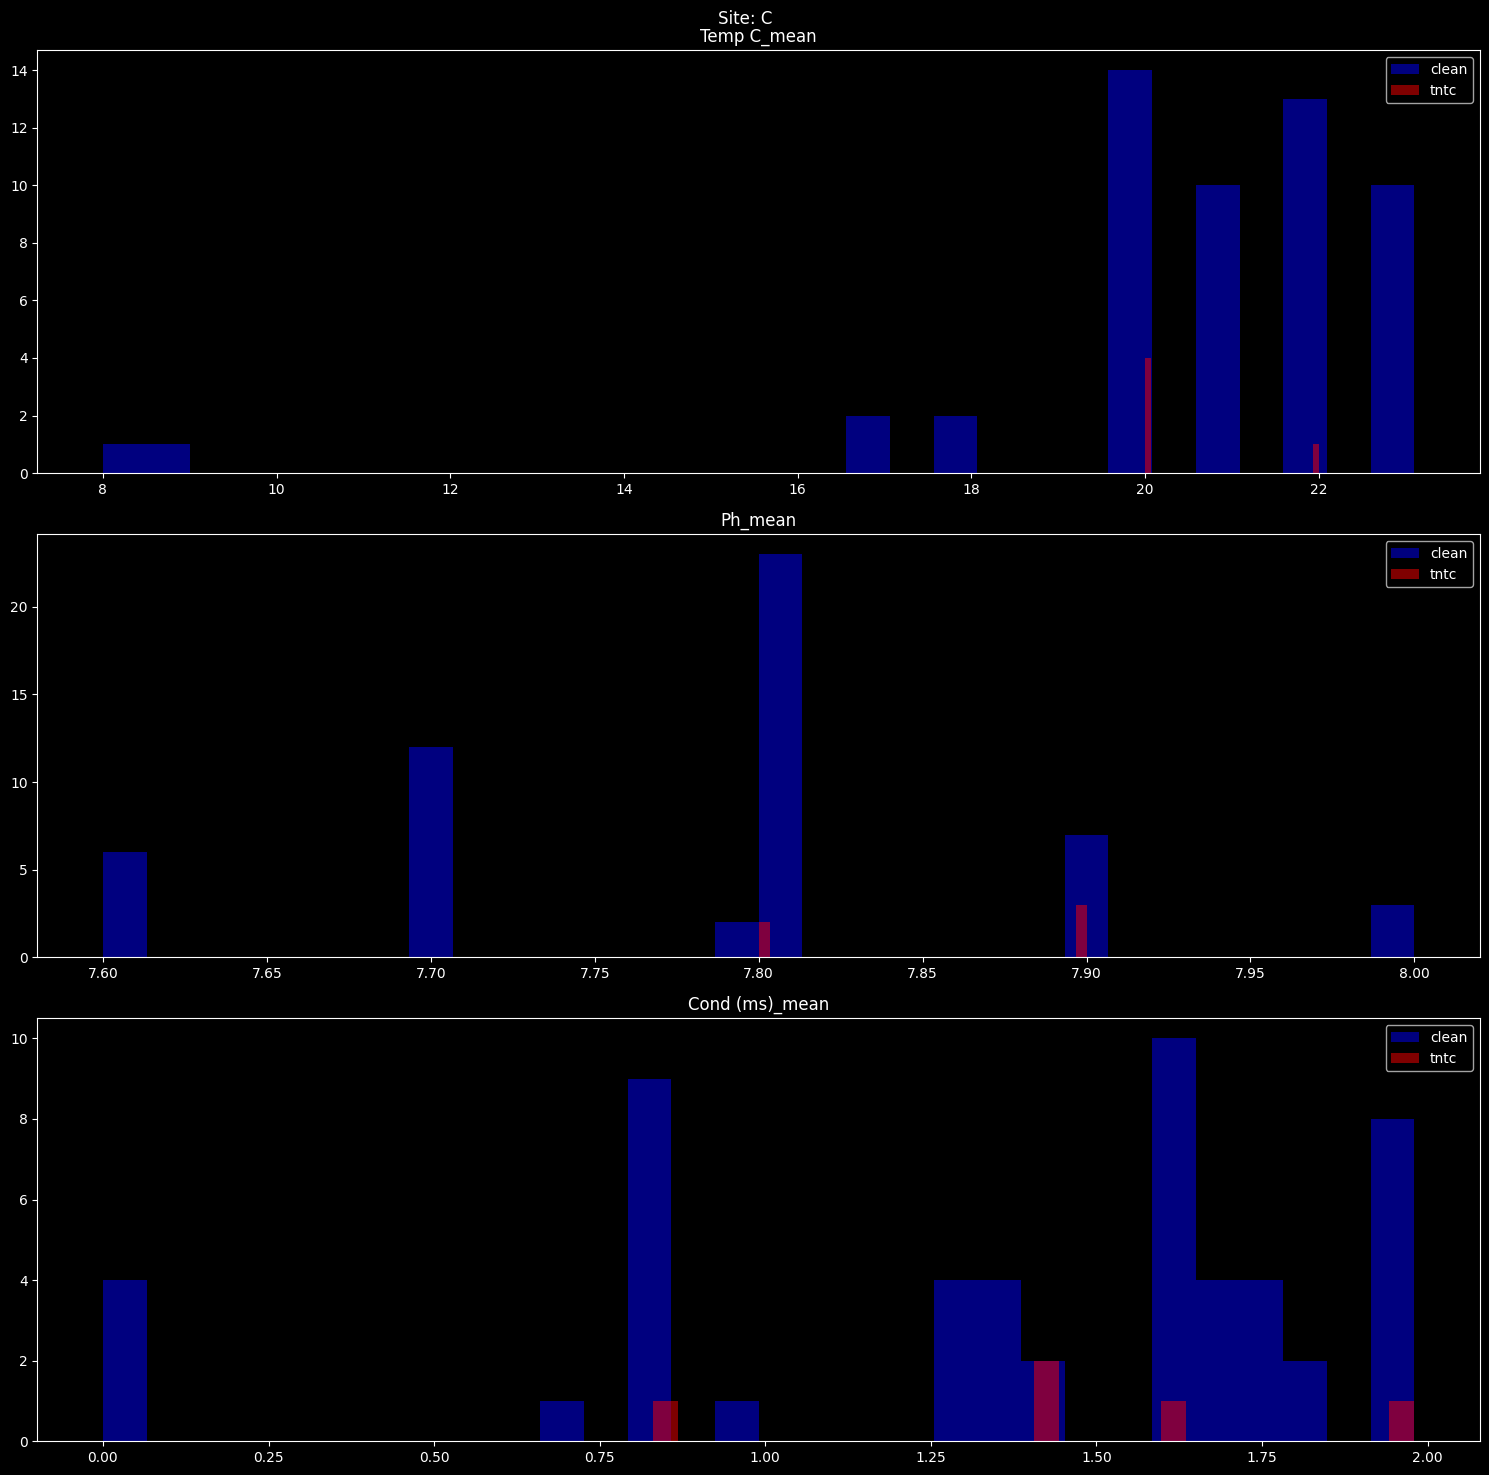

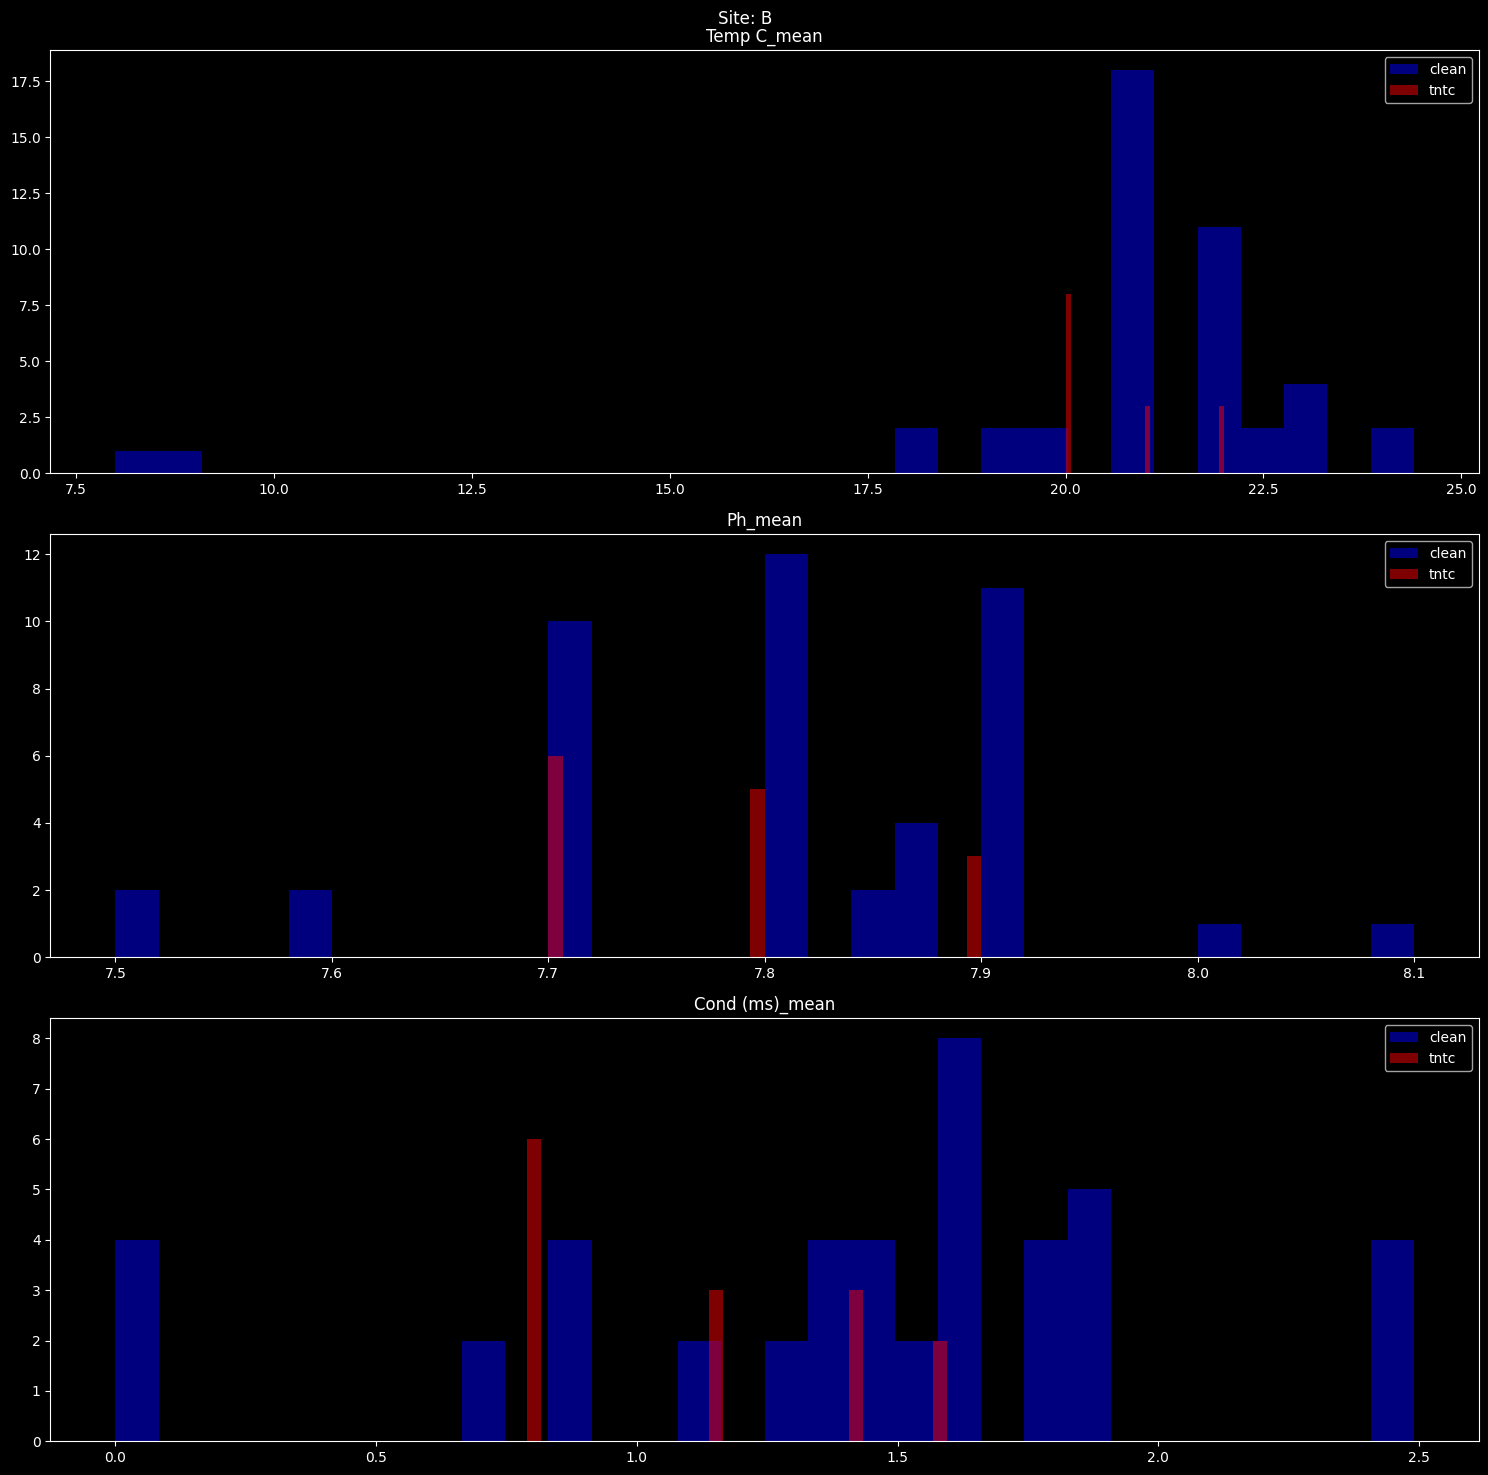

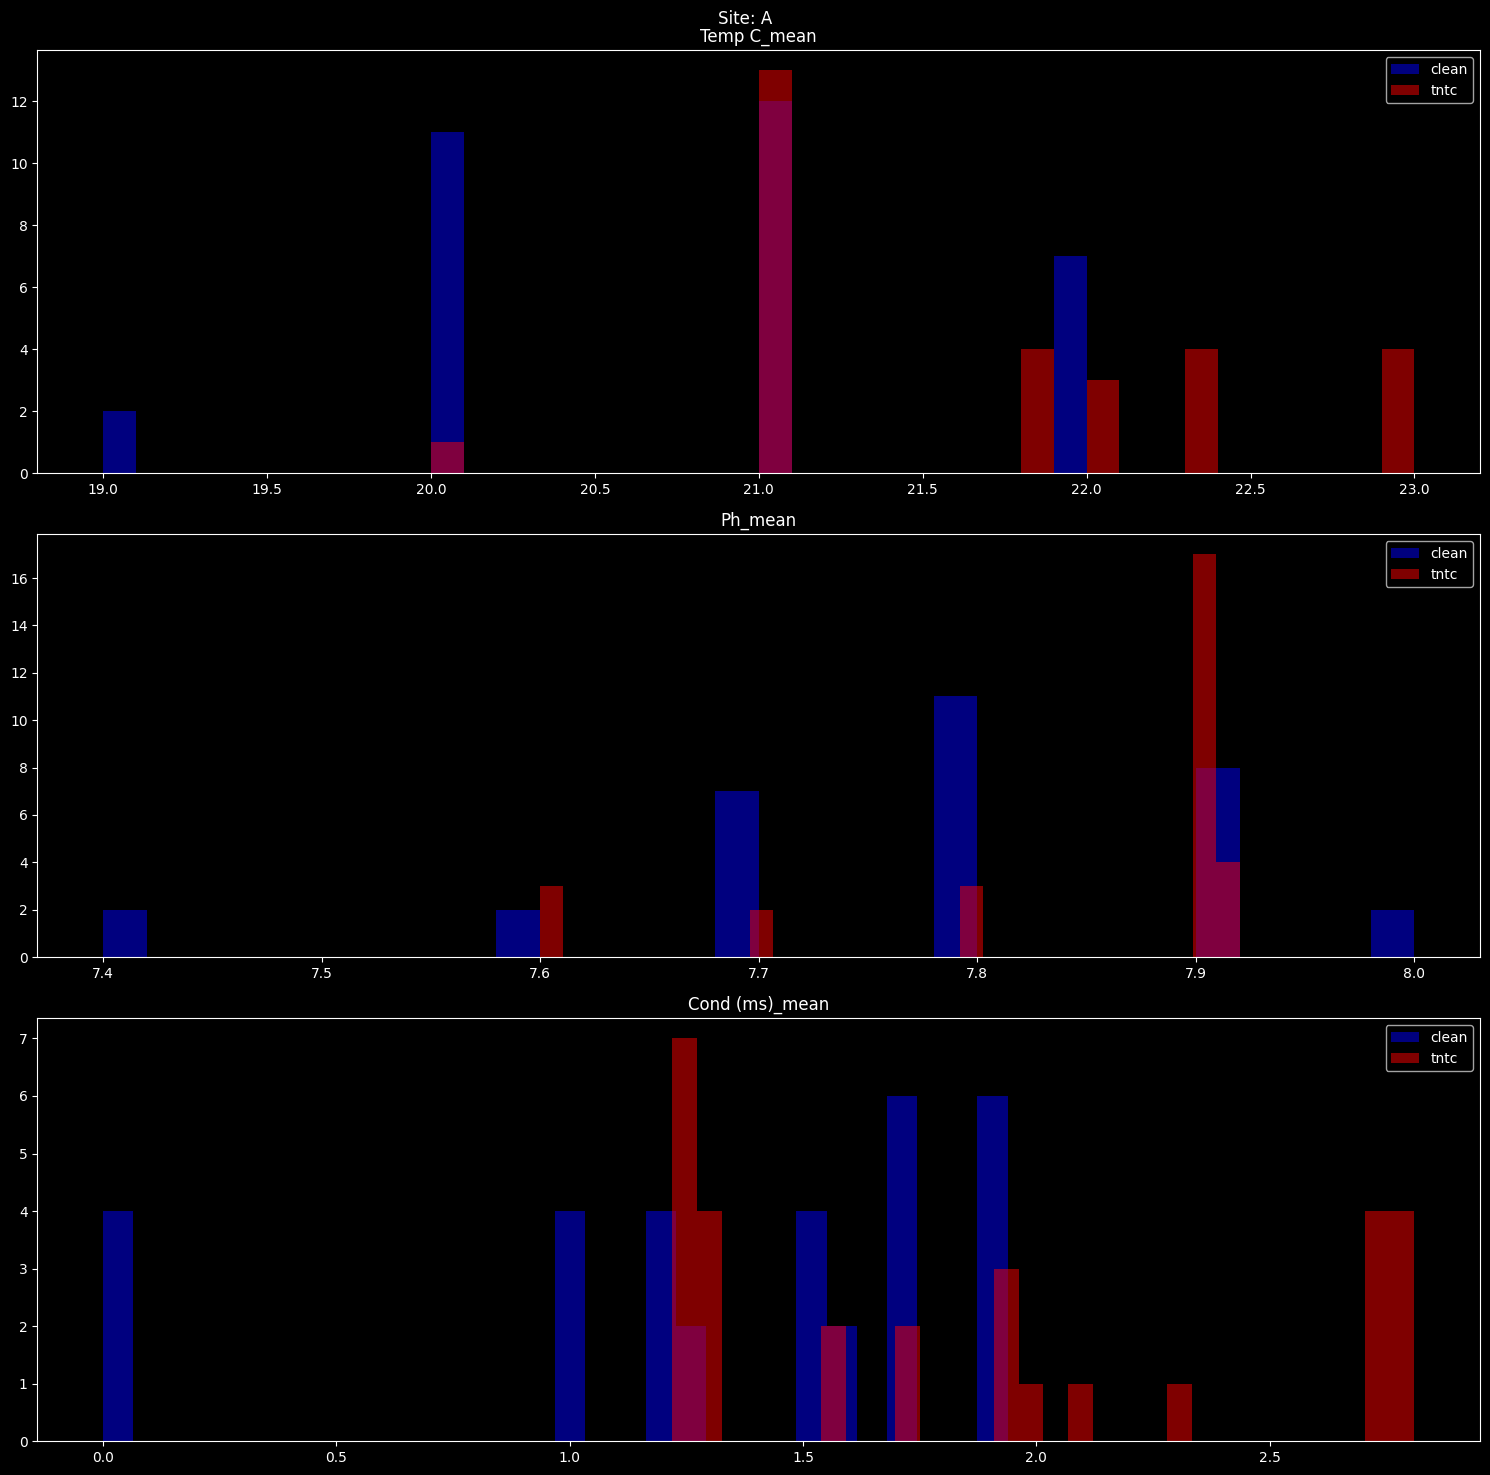

In [30]:
for site in clean_df["Site"].unique():
    clean = clean_df[clean_df["Site"] == site]
    tntc = tntc_df[tntc_df["Site"] == site]

    fig, axs = plt.subplots(3, figsize=(15, 15))
    features = ["Temp C_mean", "Ph_mean", "Cond (ms)_mean"]
    tntc_features = ["Temp C", "Ph", "Cond (ms)"]

    for i, ax in enumerate(axs):
        ax.hist(
            clean[features[i]], color="blue", alpha=0.5, bins=30, label="clean"
        )
        ax.hist(
            tntc[tntc_features[i]],
            color="red",
            alpha=0.5,
            bins=30,
            label="tntc",
        )
        ax.set_title(features[i])
        ax.legend(loc="upper right")

    plt.suptitle("Site: " + site)
    plt.tight_layout()
    plt.show()

# Overall Data Visualization and Analysis

## General Info

In [31]:
overall_df = clean_df.copy()

In [32]:
overall_df.drop(columns=["Site"], inplace=True)

In [33]:
print(overall_df.describe().to_string())
print("\n")
print(
    "Timespan: "
    + pd.to_datetime(overall_df["DateTime"]).min().strftime("%Y-%m-%d %H:%M:%S")
    + " - "
    + pd.to_datetime(overall_df["DateTime"]).max().strftime("%Y-%m-%d %H:%M:%S")
)

            index                       DateTime      Bottle      Sample  Temp C_mean  Temp C_std     Ph_mean      Ph_std  Cond (ms)_mean  Cond (ms)_std  Coliform (1ml)_mean  Coliform (1ml)_std  Ecoli (1ml)_mean  Ecoli (1ml)_std
count  258.000000                            258  258.000000  258.000000   258.000000  258.000000  258.000000  258.000000      258.000000     258.000000           258.000000          258.000000        258.000000       258.000000
mean   286.267442  2023-08-03 03:18:14.186046464    1.488372    1.468992    20.220543    0.022465    7.797287    0.000849        1.332747       0.002112           107.959109            5.565238         15.070090         0.829846
min     12.000000            2023-02-07 08:18:00    1.000000    0.000000     6.000000    0.000000    7.400000    0.000000        0.000000       0.000000             0.000000            0.000000          0.000000         0.000000
25%    207.250000            2023-08-10 10:57:30    1.000000    1.000000    20.00000

## Hypothesis Tests Correlations

### Coliform

In [34]:
r, p = stats.pearsonr(
    overall_df["Temp C_mean"], overall_df["Coliform (1ml)_mean"]
)

print("Pearsons correlation: ", r)
print("Pearsons p-value: ", p)

Pearsons correlation:  0.019051861078832923
Pearsons p-value:  0.7607013751172551


In [35]:
r, p = stats.pearsonr(overall_df["Ph_mean"], overall_df["Coliform (1ml)_mean"])

print("Pearsons correlation: ", r)
print("Pearsons p-value: ", p)

Pearsons correlation:  -0.16921737178901178
Pearsons p-value:  0.0064396817736016914


In [36]:
r, p = stats.pearsonr(
    overall_df["Cond (ms)_mean"], overall_df["Coliform (1ml)_mean"]
)

print("Pearsons correlation: ", r)
print("Pearsons p-value: ", p)

Pearsons correlation:  -0.12265409344288639
Pearsons p-value:  0.049069563294973195


### Ecoli

In [37]:
r, p = stats.pearsonr(overall_df["Temp C_mean"], overall_df["Ecoli (1ml)_mean"])

print("Pearsons correlation: ", r)
print("Pearsons p-value: ", p)

Pearsons correlation:  0.035179083766464926
Pearsons p-value:  0.5737821561909636


In [38]:
r, p = stats.pearsonr(overall_df["Ph_mean"], overall_df["Ecoli (1ml)_mean"])

print("Pearsons correlation: ", r)
print("Pearsons p-value: ", p)

Pearsons correlation:  -0.3161464364152948
Pearsons p-value:  2.1364725542223645e-07


In [39]:
r, p = stats.pearsonr(
    overall_df["Cond (ms)_mean"], overall_df["Ecoli (1ml)_mean"]
)

print("Pearsons correlation: ", r)
print("Pearsons p-value: ", p)

Pearsons correlation:  -0.0616229297424888
Pearsons p-value:  0.3241616563242033


In [40]:
r, p = stats.pearsonr(
    overall_df["Coliform (1ml)_mean"], overall_df["Ecoli (1ml)_mean"]
)

print("Pearsons correlation: ", r)
print("Pearsons p-value: ", p)

Pearsons correlation:  0.4046903066304154
Pearsons p-value:  1.378722790476377e-11


## Correlation Matrix Heatmap

[Text(0.5, 0, 'Temp C_mean'),
 Text(1.5, 0, 'Ph_mean'),
 Text(2.5, 0, 'Cond (ms)_mean'),
 Text(3.5, 0, 'Coliform (1ml)_mean'),
 Text(4.5, 0, 'Ecoli (1ml)_mean')]

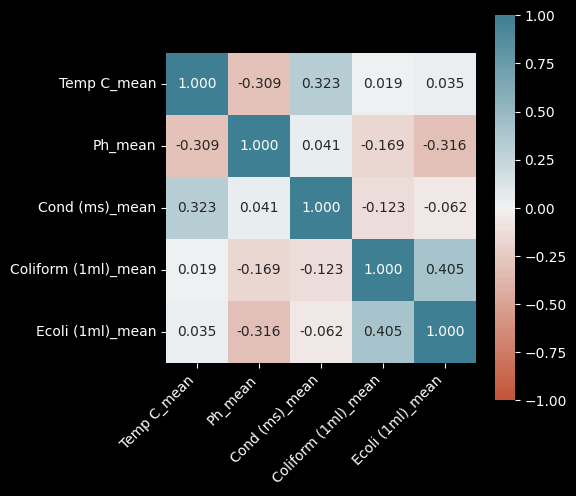

In [41]:
cols = [
    "Temp C_mean",
    "Ph_mean",
    "Cond (ms)_mean",
    "Coliform (1ml)_mean",
    "Ecoli (1ml)_mean",
]


# Pearson, used for two quantitative continuous variables which have a linear relationship
# Spearman, used for two quantitative variables if the link is partially linear, or for one qualitative ordinal variable and one quantitative variable
# Kendall, often used for two qualitative ordinal variables

corr = overall_df[cols].corr(method="pearson")

plt.figure(figsize=(5, 5))
ax = sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".3f",
)
ax.set_xticklabels(
    ax.get_xticklabels(), rotation=45, horizontalalignment="right"
)

## Scatter Plots

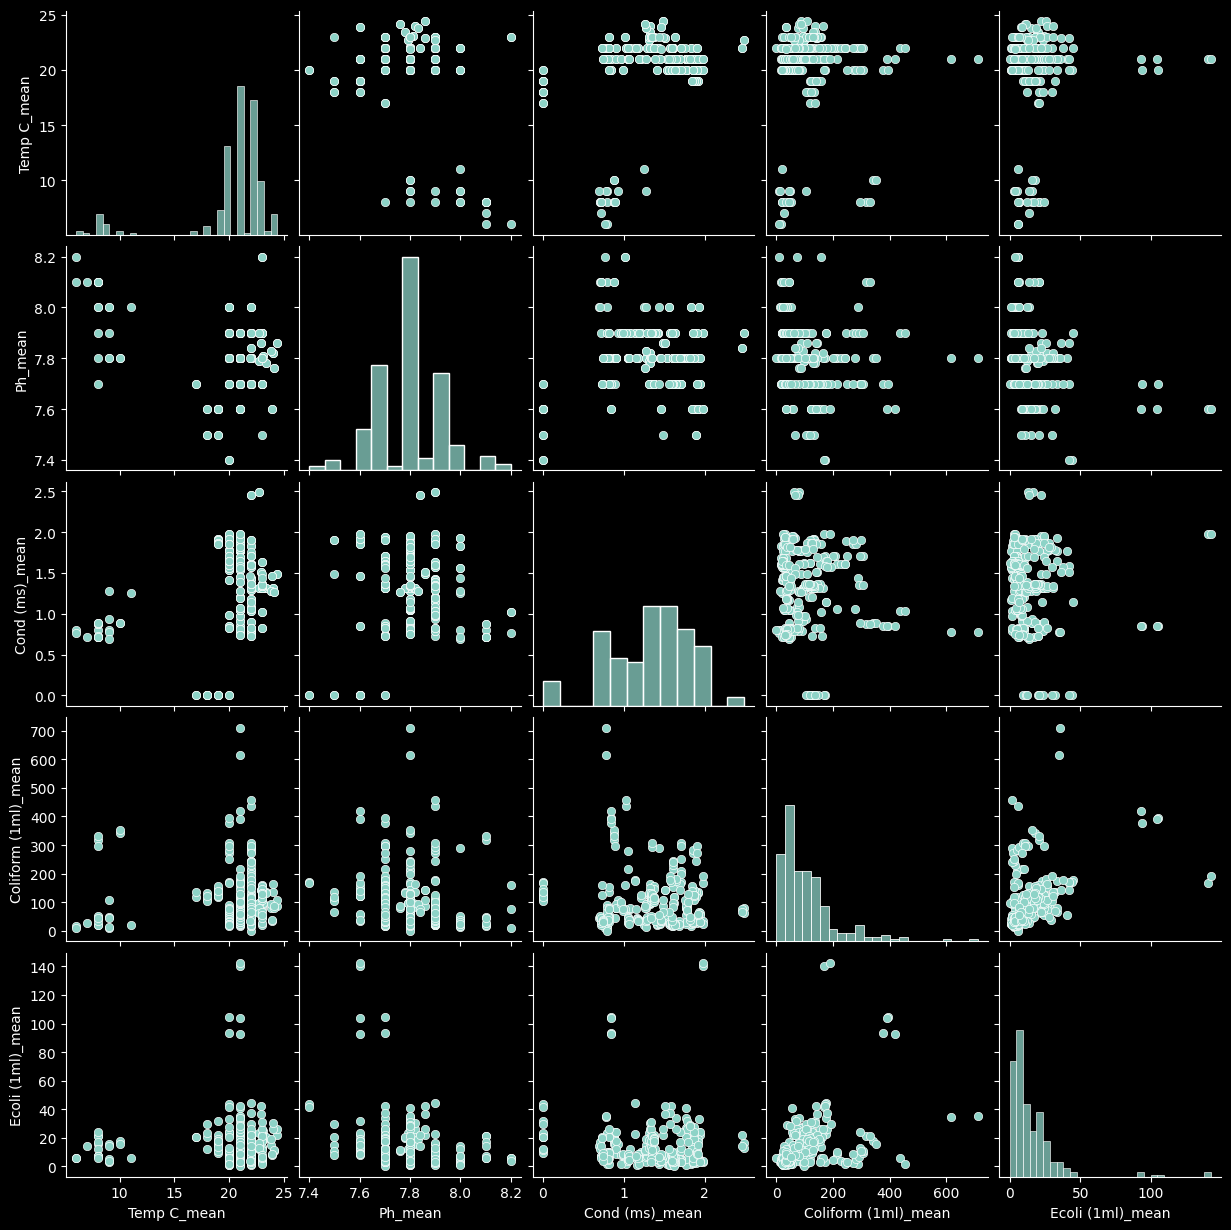

In [42]:
cols = [
    "Temp C_mean",
    "Ph_mean",
    "Cond (ms)_mean",
    "Coliform (1ml)_mean",
    "Ecoli (1ml)_mean",
]


plot = sns.pairplot(data=overall_df[cols])

## Boxplots

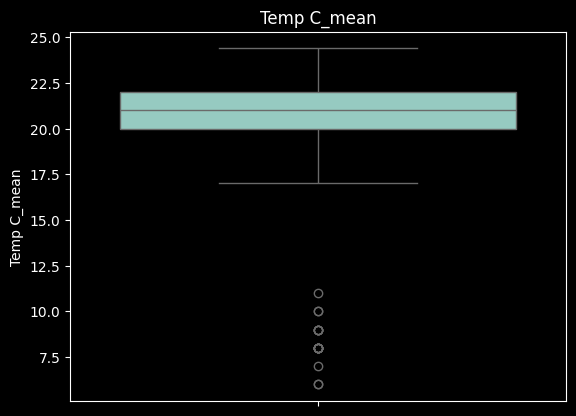

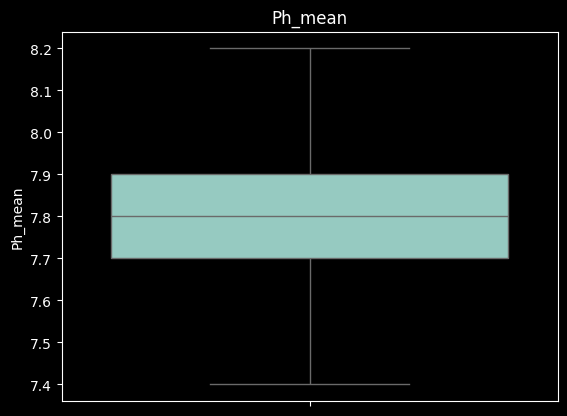

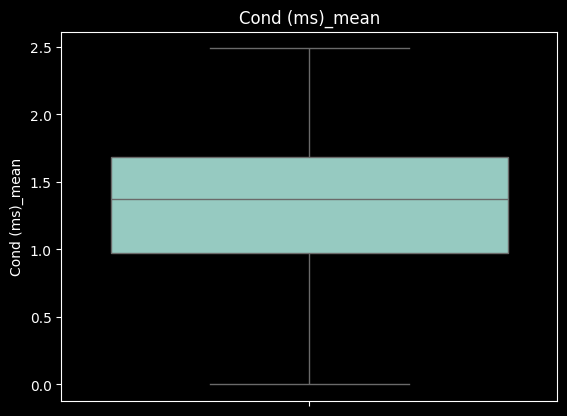

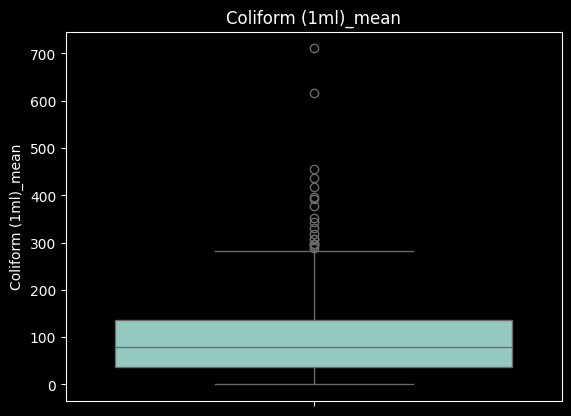

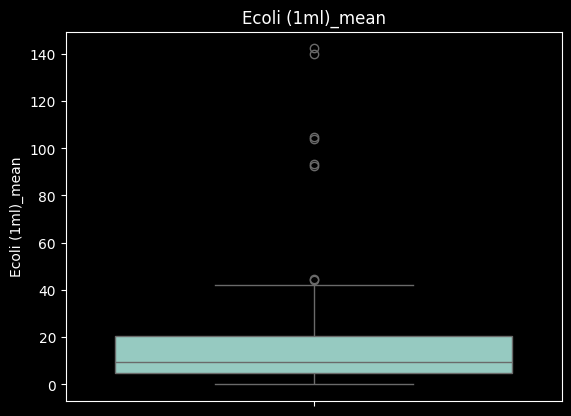

In [43]:
cols = [
    "Temp C_mean",
    "Ph_mean",
    "Cond (ms)_mean",
    "Coliform (1ml)_mean",
    "Ecoli (1ml)_mean",
]

for col in cols:
    sns.boxplot(y=overall_df[col], orient="v")
    plt.title(col)
    plt.show()

## Timeseries

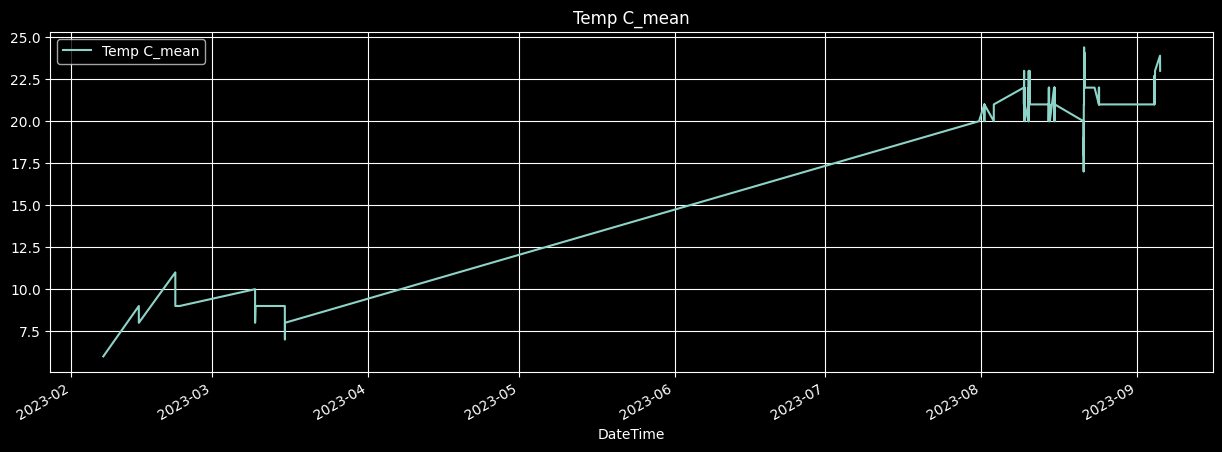

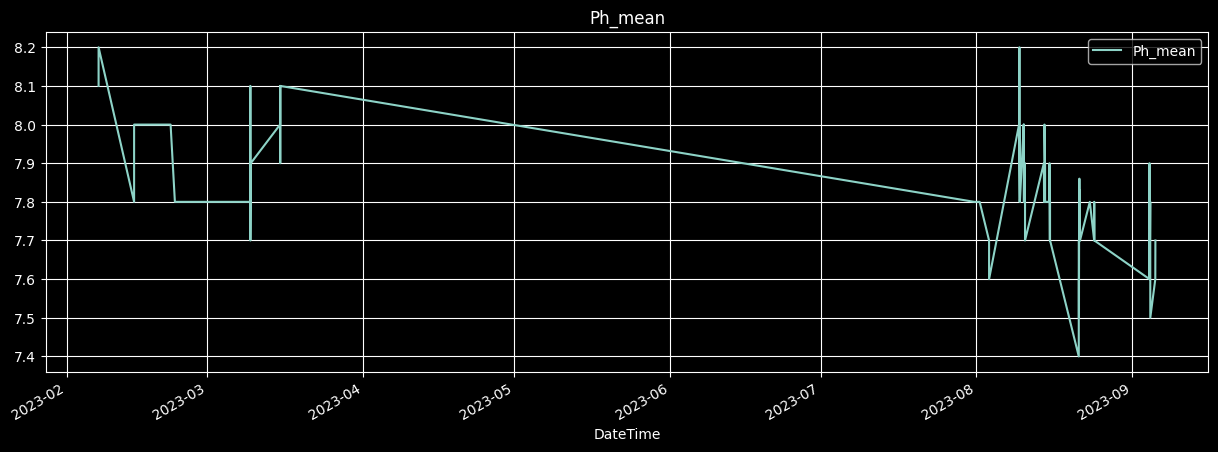

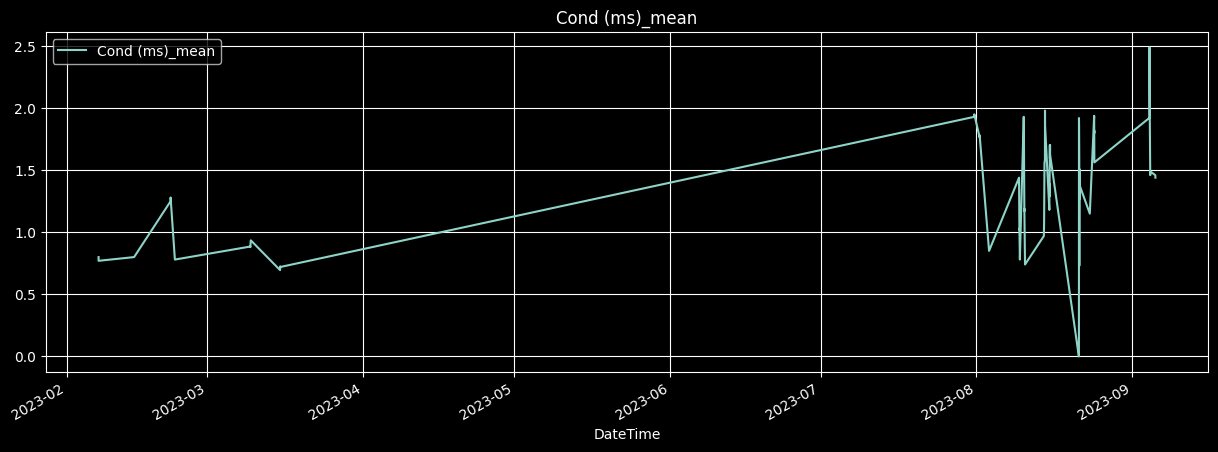

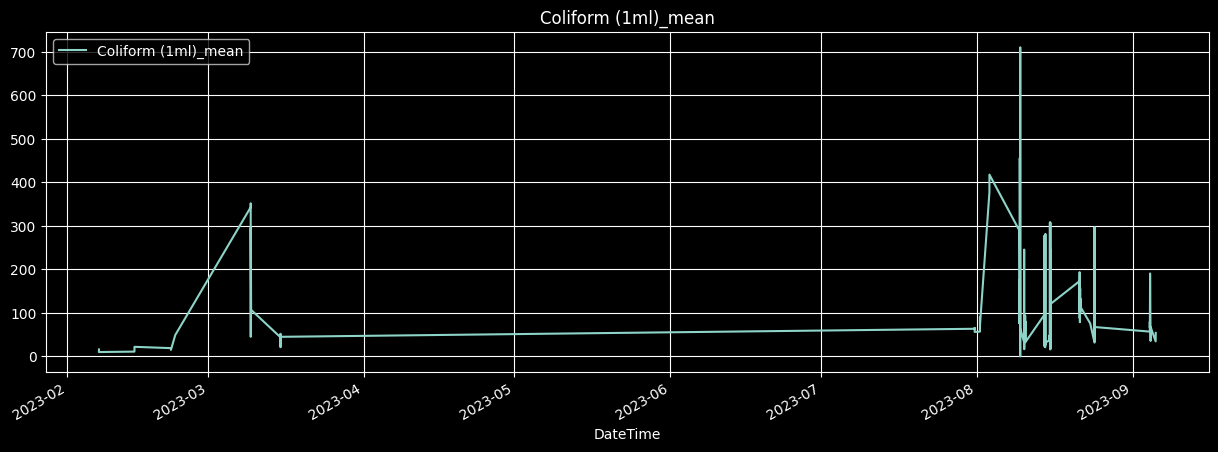

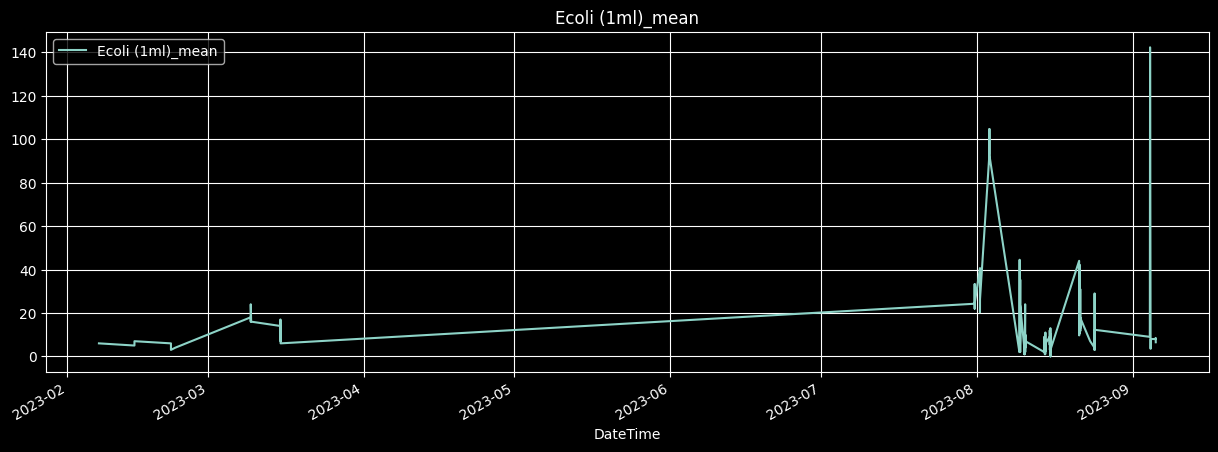

In [44]:
cols = [
    "Temp C_mean",
    "Ph_mean",
    "Cond (ms)_mean",
    "Coliform (1ml)_mean",
    "Ecoli (1ml)_mean",
]

for col in cols:
    overall_df.plot(x="DateTime", y=col, figsize=(15, 5), grid=True)
    plt.title(col)

## Check Input Distribution Difference TNTC/noTNTC

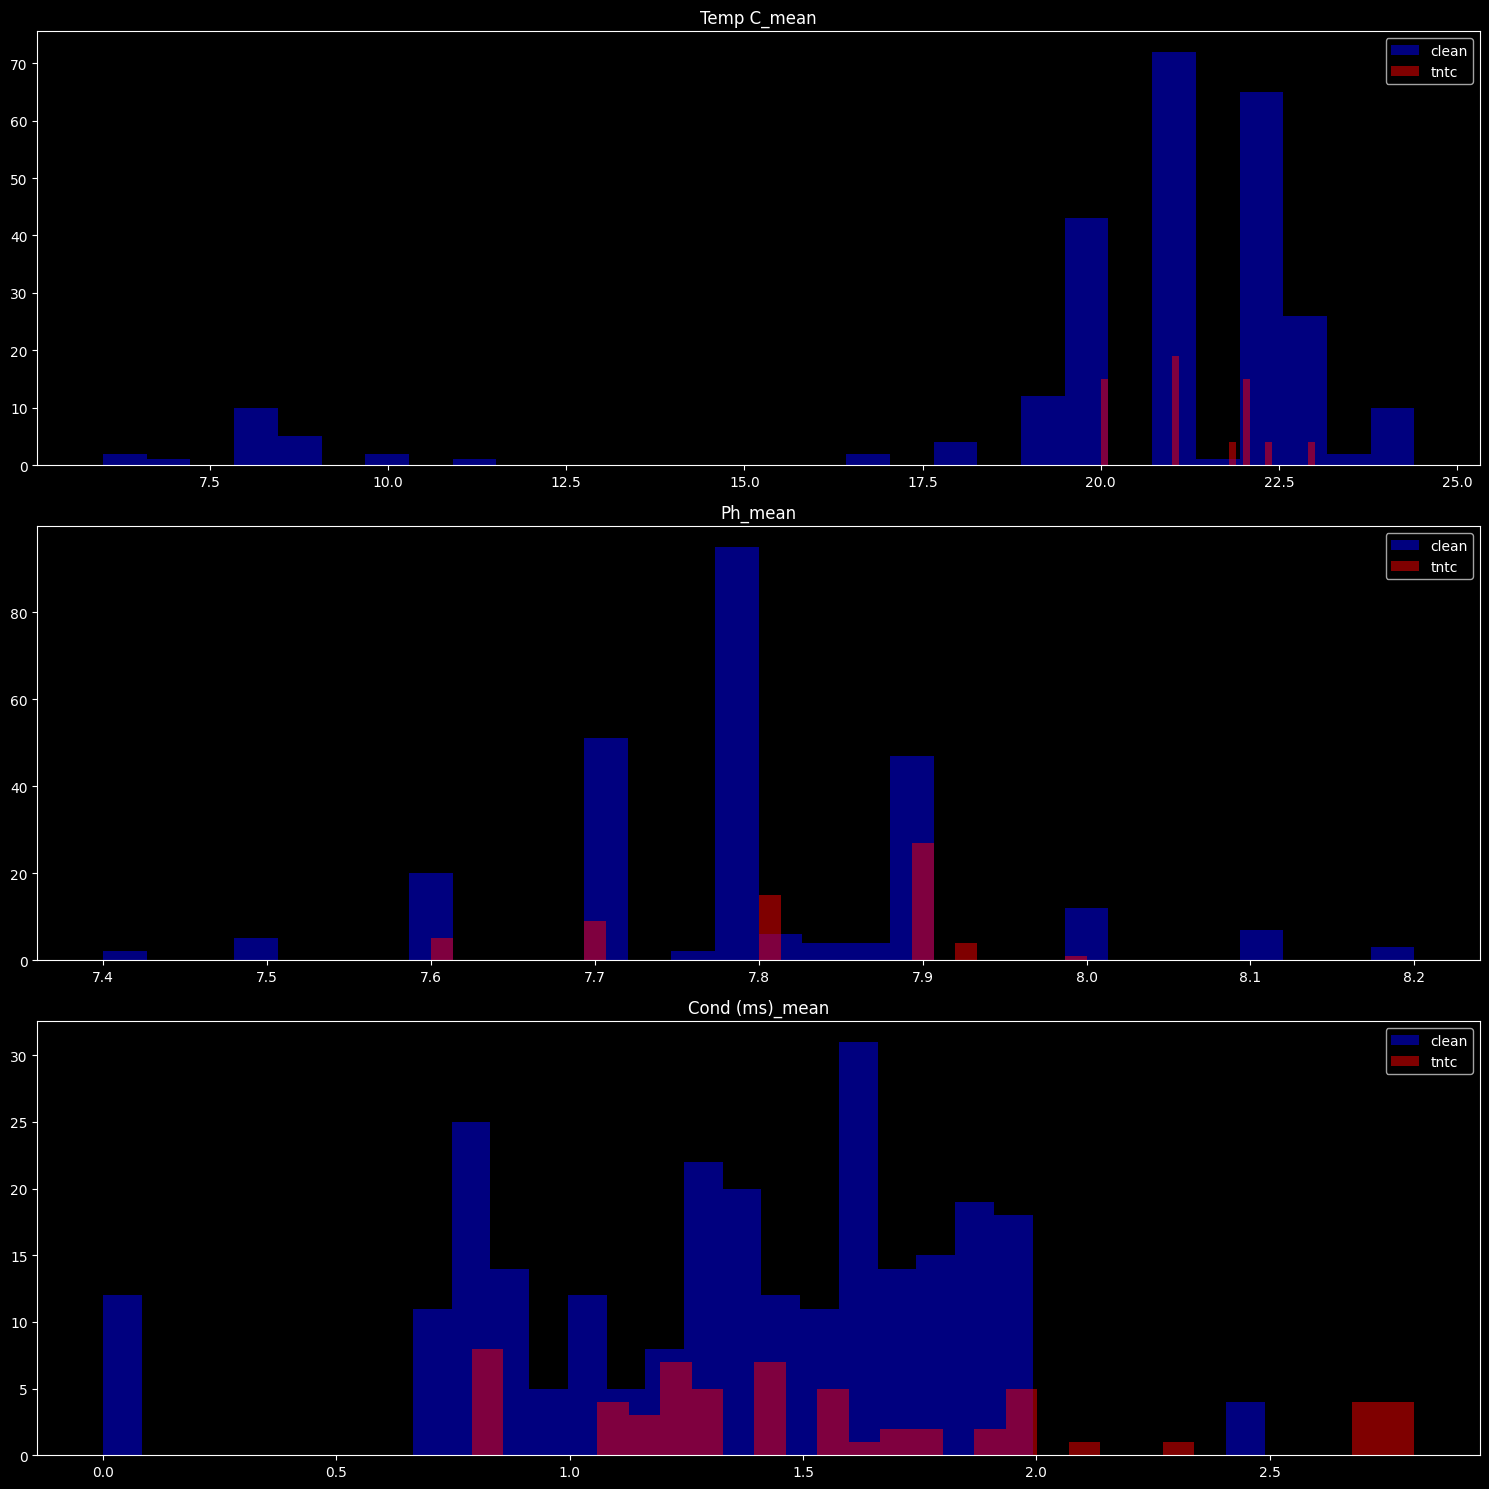

In [45]:
tntc = tntc_df.drop(columns=["Site"])

fig, axs = plt.subplots(3, figsize=(15, 15))
features = ["Temp C_mean", "Ph_mean", "Cond (ms)_mean"]
tntc_features = ["Temp C", "Ph", "Cond (ms)"]

for i, ax in enumerate(axs):
    ax.hist(
        overall_df[features[i]], color="blue", alpha=0.5, bins=30, label="clean"
    )
    ax.hist(
        tntc[tntc_features[i]],
        color="red",
        alpha=0.5,
        bins=30,
        label="tntc",
    )
    ax.set_title(features[i])
    ax.legend(loc="upper right")

plt.tight_layout()
plt.show()

# Further Processing

In [46]:
clean = clean_df.copy()
tntc = tntc_df.copy()

In [47]:
rename_dict = {
    "Temp C": "Temp C_mean",
    "Ph": "Ph_mean",
    "Cond (ms)": "Cond (ms)_mean",
    "Coliform (1ml)": "Coliform (1ml)_mean",
    "Ecoli (1ml)": "Ecoli (1ml)_mean",
}

In [48]:
tntc.rename(columns=rename_dict, inplace=True)

In [49]:
tntc.drop(columns=["Image Date Time", "Dilution"], inplace=True)

In [50]:
clean_df

,index,DateTime,Site,Bottle,Sample,Technician Water Quality,Technician Counting,Temp C_mean,Temp C_std,Ph_mean,Ph_std,Cond (ms)_mean,Cond (ms)_std,Coliform (1ml)_mean,Coliform (1ml)_std,Ecoli (1ml)_mean,Ecoli (1ml)_std
12,12,2023-02-07 08:18:00,D,1,0,Randa,Randa,6.0,0.0,8.1,0.0,0.80,0.0,16.0,0.000000,6.0,0.000000
13,13,2023-02-07 08:18:00,D,2,0,Randa,Randa,6.0,0.0,8.2,0.0,0.77,0.0,10.0,0.000000,6.0,0.000000
24,24,2023-02-14 09:55:00,D,1,0,Randa,Randa,9.0,0.0,7.8,0.0,0.80,0.0,11.0,0.000000,5.0,0.000000
25,25,2023-02-14 09:55:00,D,2,0,Randa,Randa,8.0,0.0,8.0,0.0,0.80,0.0,22.0,0.000000,7.0,0.000000
36,36,2023-02-21 16:10:00,D,1,0,Randa,Randa,11.0,0.0,8.0,0.0,1.25,0.0,19.0,0.000000,6.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,620,2023-09-04 14:06:00,D,2,2,None,Admin,21.9,0.0,7.8,0.0,1.46,0.0,35.5,0.707107,3.5,0.707107
629,629,2023-09-04 14:22:00,D,1,1,None,Admin,23.0,0.0,7.5,0.0,1.49,0.0,67.5,0.707107,8.0,0.000000
720,720,2023-09-05 14:15:00,D,1,1,None,Vee,23.9,0.0,7.6,0.0,1.46,0.0,34.5,0.707107,8.0,0.000000
721,721,2023-09-05 14:15:00,D,1,2,None,Vee,23.9,0.0,7.6,0.0,1.46,0.0,36.5,0.707107,8.5,0.707107


In [51]:
clean_df.to_excel(
    os.path.join(dir_store_path, "clean_dataset.xlsx"), index=False
)

In [53]:
tntc_df.to_excel(os.path.join(dir_store_path, "tntc_dataset.xlsx"), index=False)

In [50]:
full_df = pd.concat([clean, tntc])

### Processed clean_df with means and stds computed + TNTC

In [51]:
full_df

,index,DateTime,Site,Bottle,Sample,Technician Water Quality,Technician Counting,Temp C_mean,Temp C_std,Ph_mean,Ph_std,Cond (ms)_mean,Cond (ms)_std,Coliform (1ml)_mean,Coliform (1ml)_std,Ecoli (1ml)_mean,Ecoli (1ml)_std,CV_Coliform,CV_Ecoli
16,16.0,2023-02-07 08:18:00,D,1,0.0,Randa,Randa,6.0,0.0,8.10,0.0,0.800000,0.0,16.0,0.0,6.0,0.0,0.0,0.0
17,17.0,2023-02-07 08:18:00,D,2,0.0,Randa,Randa,6.0,0.0,8.20,0.0,0.770000,0.0,10.0,0.0,6.0,0.0,0.0,0.0
28,28.0,2023-02-14 09:55:00,D,1,0.0,Randa,Randa,9.0,0.0,7.80,0.0,0.800000,0.0,11.0,0.0,5.0,0.0,0.0,0.0
29,29.0,2023-02-14 09:55:00,D,2,0.0,Randa,Randa,8.0,0.0,8.00,0.0,0.800000,0.0,22.0,0.0,7.0,0.0,0.0,0.0
40,40.0,2023-02-21 16:10:00,D,1,0.0,Randa,Randa,11.0,0.0,8.00,0.0,1.250000,0.0,19.0,0.0,6.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,NaN,2023-09-04 10:15:00,A,2,2.0,NaN,Admin,21.8,NaN,7.92,NaN,2.730000,NaN,0,NaN,46,NaN,NaN,NaN
2082,NaN,2023-09-04 12:11:00,E,2,1.0,NaN,Admin,22.0,NaN,7.60,NaN,1.680000,NaN,0,NaN,24,NaN,NaN,NaN
2083,NaN,2023-09-04 12:11:00,E,2,2.0,NaN,Admin,22.0,NaN,7.60,NaN,1.680000,NaN,0,NaN,18,NaN,NaN,NaN
2163,NaN,2023-09-05 10:26:00,A,2,2.0,NaN,Admin,22.0,NaN,7.60,NaN,2.093750,NaN,TNTC,NaN,TNTC,NaN,NaN,NaN


In [52]:
full_df.drop(
    columns=[
        "Temp C_std",
        "Ph_std",
        "Cond (ms)_std",
        "Coliform (1ml)_std",
        "Ecoli (1ml)_std",
    ],
    inplace=True,
)

In [53]:
processed_dataset_path = os.path.join(dir_store_path, "processed_dataset.xlsx")

full_df.to_excel(processed_dataset_path)